# Purpose of county_education Notebook

The function and purpose of this notebook is as a partial analysis of time series data collected on unemployment rate in counties in California. <br> 

We aim to create a binary classifier out of 'Unemployment Rate', and determine whether or not the highest unemployment rate in a county happened during the pandemic or prior to.<br> 

The reason for using a binary classifier to determine whether or not a county's highest unemployment rate happened during the pandemic or not is to create an understanding that while all counties in California suffered unemployability due to the pandemic, counties that experienced higher unemployment rates outside of the pandemic would be subject to our educational analysis. The goal then is to determine the general education level in that county according to the __[United States Census Bureau](https://www.census.gov/)__ and consider whether or not that has to do with a county's unemployment rate. <br> 

Another main reason for creating another notebook for this data is to consider __seasonality__ and exploring what that means for the larger business suggestion for the state of California's __[EDD](https://edd.ca.gov/about_edd/#:~:text=The%20Employment%20Development%20Department%20(EDD,service%20locations%20throughout%20the%20state.)__ (Employment Development Department). 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Method-of-Analysis" data-toc-modified-id="Method-of-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Method of Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Function-to-plot-county-information" data-toc-modified-id="Function-to-plot-county-information-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Function to plot county information</a></span></li></ul></li><li><span><a href="#California-Agricultural-Production-Statistics" data-toc-modified-id="California-Agricultural-Production-Statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong><a href="https://www.cdfa.ca.gov/Statistics/" target="_blank">California Agricultural Production Statistics</a></strong></a></span></li></ul></li><li><span><a href="#Make-datetime-information" data-toc-modified-id="Make-datetime-information-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Make datetime information</a></span><ul class="toc-item"><li><span><a href="#Seasonal-Adjustment" data-toc-modified-id="Seasonal-Adjustment-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Seasonal Adjustment</a></span></li><li><span><a href="#Counties" data-toc-modified-id="Counties-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Counties</a></span></li><li><span><a href="#Has-every-county-been-keeping-data-for-the-same-amount-of-time?" data-toc-modified-id="Has-every-county-been-keeping-data-for-the-same-amount-of-time?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Has every county been keeping data for the same amount of time?</a></span></li><li><span><a href="#Function-for-county-with-highest-unemployment-and-time-of-highest-unemployment" data-toc-modified-id="Function-for-county-with-highest-unemployment-and-time-of-highest-unemployment-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Function for county with highest unemployment and time of highest unemployment</a></span><ul class="toc-item"><li><span><a href="#Los-Angeles-County-Education-Level" data-toc-modified-id="Los-Angeles-County-Education-Level-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Los Angeles County Education Level</a></span></li><li><span><a href="#In-consideration-of-COVID-19" data-toc-modified-id="In-consideration-of-COVID-19-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>In consideration of COVID-19</a></span></li></ul></li><li><span><a href="#Alameda-County" data-toc-modified-id="Alameda-County-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06001.pdf" target="_blank">Alameda County</a></strong></a></span></li><li><span><a href="#San-Bernardino-County" data-toc-modified-id="San-Bernardino-County-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06071.pdf" target="_blank">San Bernardino County</a></strong></a></span></li><li><span><a href="#Riverside-County" data-toc-modified-id="Riverside-County-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06065.pdf" target="_blank">Riverside County</a></strong></a></span></li><li><span><a href="#Placer-County" data-toc-modified-id="Placer-County-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06061.pdf" target="_blank">Placer County</a></strong></a></span></li><li><span><a href="#Siskiyou-County" data-toc-modified-id="Siskiyou-County-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06093.pdf" target="_blank">Siskiyou County</a></strong></a></span></li><li><span><a href="#Madera-County" data-toc-modified-id="Madera-County-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06039.pdf" target="_blank">Madera County</a></strong></a></span><ul class="toc-item"><li><span><a href="#Madera-explored" data-toc-modified-id="Madera-explored-4.10.1"><span class="toc-item-num">4.10.1&nbsp;&nbsp;</span>Madera explored</a></span></li></ul></li><li><span><a href="#El-Dorado-County" data-toc-modified-id="El-Dorado-County-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06017.pdf" target="_blank">El Dorado County</a></strong></a></span></li><li><span><a href="#Calaveras-County" data-toc-modified-id="Calaveras-County-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06009.pdf" target="_blank">Calaveras County</a></strong></a></span></li><li><span><a href="#Sutter-County" data-toc-modified-id="Sutter-County-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06101.pdf" target="_blank">Sutter County</a></strong></a></span></li><li><span><a href="#Colusa-County" data-toc-modified-id="Colusa-County-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06011.pdf" target="_blank">Colusa County</a></strong></a></span></li><li><span><a href="#Butte-County" data-toc-modified-id="Butte-County-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06007.pdf" target="_blank">Butte County</a></strong></a></span></li><li><span><a href="#Lake-County" data-toc-modified-id="Lake-County-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06033.pdf" target="_blank">Lake County</a></strong></a></span></li><li><span><a href="#Yuba-County" data-toc-modified-id="Yuba-County-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06115.pdf" target="_blank">Yuba County</a></strong></a></span></li><li><span><a href="#Del-Norte-County" data-toc-modified-id="Del-Norte-County-4.18"><span class="toc-item-num">4.18&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06015.pdf" target="_blank">Del Norte County</a></strong></a></span></li><li><span><a href="#Yolo-County" data-toc-modified-id="Yolo-County-4.19"><span class="toc-item-num">4.19&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06113.pdf" target="_blank">Yolo County</a></strong></a></span></li><li><span><a href="#San-Diego-County" data-toc-modified-id="San-Diego-County-4.20"><span class="toc-item-num">4.20&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06073.pdf" target="_blank">San Diego County</a></strong></a></span></li><li><span><a href="#Humboldt-County" data-toc-modified-id="Humboldt-County-4.21"><span class="toc-item-num">4.21&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06023.pdf" target="_blank">Humboldt County</a></strong></a></span></li><li><span><a href="#Amador-County" data-toc-modified-id="Amador-County-4.22"><span class="toc-item-num">4.22&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06005.pdf" target="_blank">Amador County</a></strong></a></span></li><li><span><a href="#Glenn-County" data-toc-modified-id="Glenn-County-4.23"><span class="toc-item-num">4.23&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06021.pdf" target="_blank">Glenn County</a></strong></a></span></li><li><span><a href="#Mono-County" data-toc-modified-id="Mono-County-4.24"><span class="toc-item-num">4.24&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06051.pdf" target="_blank">Mono County</a></strong></a></span></li><li><span><a href="#Ventura-County" data-toc-modified-id="Ventura-County-4.25"><span class="toc-item-num">4.25&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06111.pdf" target="_blank">Ventura County</a></strong></a></span></li><li><span><a href="#Plumas-County" data-toc-modified-id="Plumas-County-4.26"><span class="toc-item-num">4.26&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06063.pdf" target="_blank">Plumas County</a></strong></a></span></li><li><span><a href="#Solano-County" data-toc-modified-id="Solano-County-4.27"><span class="toc-item-num">4.27&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06095.pdf" target="_blank">Solano County</a></strong></a></span></li><li><span><a href="#Napa-County" data-toc-modified-id="Napa-County-4.28"><span class="toc-item-num">4.28&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06055.pdf" target="_blank">Napa County</a></strong></a></span></li><li><span><a href="#San-Luis-Obispo-County" data-toc-modified-id="San-Luis-Obispo-County-4.29"><span class="toc-item-num">4.29&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06079.pdf" target="_blank">San Luis Obispo County</a></strong></a></span></li><li><span><a href="#Tuolumne-County" data-toc-modified-id="Tuolumne-County-4.30"><span class="toc-item-num">4.30&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06109.pdf" target="_blank">Tuolumne County</a></strong></a></span></li><li><span><a href="#Alpine-County" data-toc-modified-id="Alpine-County-4.31"><span class="toc-item-num">4.31&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06003.pdf" target="_blank">Alpine County</a></strong></a></span></li><li><span><a href="#Sierra-County" data-toc-modified-id="Sierra-County-4.32"><span class="toc-item-num">4.32&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06091.pdf" target="_blank">Sierra County</a></strong></a></span></li><li><span><a href="#Tehama-County" data-toc-modified-id="Tehama-County-4.33"><span class="toc-item-num">4.33&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06103.pdf" target="_blank">Tehama County</a></strong></a></span></li><li><span><a href="#Marin-County" data-toc-modified-id="Marin-County-4.34"><span class="toc-item-num">4.34&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06041.pdf" target="_blank">Marin County</a></strong></a></span></li><li><span><a href="#Trinity-County" data-toc-modified-id="Trinity-County-4.35"><span class="toc-item-num">4.35&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06105.pdf" target="_blank">Trinity County</a></strong></a></span></li><li><span><a href="#Monterey-County" data-toc-modified-id="Monterey-County-4.36"><span class="toc-item-num">4.36&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06053.pdf" target="_blank">Monterey County</a></strong></a></span></li><li><span><a href="#Orange-County" data-toc-modified-id="Orange-County-4.37"><span class="toc-item-num">4.37&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06059.pdf" target="_blank">Orange County</a></strong></a></span></li><li><span><a href="#San-Francisco-County" data-toc-modified-id="San-Francisco-County-4.38"><span class="toc-item-num">4.38&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06075.pdf" target="_blank">San Francisco County</a></strong></a></span></li><li><span><a href="#Mendocino-County" data-toc-modified-id="Mendocino-County-4.39"><span class="toc-item-num">4.39&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06045.pdf" target="_blank">Mendocino County</a></strong></a></span></li><li><span><a href="#Santa-Cruz-County" data-toc-modified-id="Santa-Cruz-County-4.40"><span class="toc-item-num">4.40&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06087.pdf" target="_blank">Santa Cruz County</a></strong></a></span></li><li><span><a href="#Kings-County" data-toc-modified-id="Kings-County-4.41"><span class="toc-item-num">4.41&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06031.pdf" target="_blank">Kings County</a></strong></a></span></li><li><span><a href="#Fresno-County" data-toc-modified-id="Fresno-County-4.42"><span class="toc-item-num">4.42&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06019.pdf" target="_blank">Fresno County</a></strong></a></span></li><li><span><a href="#Santa-Barbara-County" data-toc-modified-id="Santa-Barbara-County-4.43"><span class="toc-item-num">4.43&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06083.pdf" target="_blank">Santa Barbara County</a></strong></a></span></li><li><span><a href="#Shasta-County" data-toc-modified-id="Shasta-County-4.44"><span class="toc-item-num">4.44&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06089.pdf" target="_blank">Shasta County</a></strong></a></span></li><li><span><a href="#Sonoma-County" data-toc-modified-id="Sonoma-County-4.45"><span class="toc-item-num">4.45&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06097.pdf" target="_blank">Sonoma County</a></strong></a></span></li><li><span><a href="#Kern-County" data-toc-modified-id="Kern-County-4.46"><span class="toc-item-num">4.46&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06029.pdf" target="_blank">Kern County</a></strong></a></span></li><li><span><a href="#Modoc-County" data-toc-modified-id="Modoc-County-4.47"><span class="toc-item-num">4.47&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06049.pdf" target="_blank">Modoc County</a></strong></a></span></li><li><span><a href="#Sacramento-County" data-toc-modified-id="Sacramento-County-4.48"><span class="toc-item-num">4.48&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06067.pdf" target="_blank">Sacramento County</a></strong></a></span></li><li><span><a href="#Santa-Clara-County" data-toc-modified-id="Santa-Clara-County-4.49"><span class="toc-item-num">4.49&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06085.pdf" target="_blank">Santa Clara County</a></strong></a></span></li><li><span><a href="#San-Joaquin-County" data-toc-modified-id="San-Joaquin-County-4.50"><span class="toc-item-num">4.50&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06077.pdf" target="_blank">San Joaquin County</a></strong></a></span></li><li><span><a href="#Nevada-County" data-toc-modified-id="Nevada-County-4.51"><span class="toc-item-num">4.51&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06057.pdf" target="_blank">Nevada County</a></strong></a></span></li><li><span><a href="#Mariposa-County" data-toc-modified-id="Mariposa-County-4.52"><span class="toc-item-num">4.52&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06043.pdf" target="_blank">Mariposa County</a></strong></a></span></li><li><span><a href="#Tulare-County" data-toc-modified-id="Tulare-County-4.53"><span class="toc-item-num">4.53&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06107.pdf" target="_blank">Tulare County</a></strong></a></span></li><li><span><a href="#Contra-Costa-County" data-toc-modified-id="Contra-Costa-County-4.54"><span class="toc-item-num">4.54&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06013.pdf" target="_blank">Contra Costa County</a></strong></a></span></li><li><span><a href="#Merced-County" data-toc-modified-id="Merced-County-4.55"><span class="toc-item-num">4.55&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06047.pdf" target="_blank">Merced County</a></strong></a></span></li><li><span><a href="#San-Benito-County" data-toc-modified-id="San-Benito-County-4.56"><span class="toc-item-num">4.56&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06069.pdf" target="_blank">San Benito County</a></strong></a></span></li><li><span><a href="#Lassen-County" data-toc-modified-id="Lassen-County-4.57"><span class="toc-item-num">4.57&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06035.pdf" target="_blank">Lassen County</a></strong></a></span></li><li><span><a href="#San-Mateo-County" data-toc-modified-id="San-Mateo-County-4.58"><span class="toc-item-num">4.58&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06081.pdf" target="_blank">San Mateo County</a></strong></a></span></li><li><span><a href="#Stanislaus-County" data-toc-modified-id="Stanislaus-County-4.59"><span class="toc-item-num">4.59&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06099.pdf" target="_blank">Stanislaus County</a></strong></a></span></li><li><span><a href="#Inyo-County" data-toc-modified-id="Inyo-County-4.60"><span class="toc-item-num">4.60&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06027.pdf" target="_blank">Inyo County</a></strong></a></span></li><li><span><a href="#Imperial-County" data-toc-modified-id="Imperial-County-4.61"><span class="toc-item-num">4.61&nbsp;&nbsp;</span><strong><a href="https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06025.pdf" target="_blank">Imperial County</a></strong></a></span></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-4.62"><span class="toc-item-num">4.62&nbsp;&nbsp;</span>Hypothesis Testing</a></span><ul class="toc-item"><li><span><a href="#So-how-will-we-test-this?" data-toc-modified-id="So-how-will-we-test-this?-4.62.1"><span class="toc-item-num">4.62.1&nbsp;&nbsp;</span>So how will we test this?</a></span></li></ul></li></ul></li><li><span><a href="#Baseline-Model:-DecisionTreeClassifier()" data-toc-modified-id="Baseline-Model:-DecisionTreeClassifier()-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Baseline Model: DecisionTreeClassifier()</a></span></li><li><span><a href="#RandomForestClassifier()" data-toc-modified-id="RandomForestClassifier()-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RandomForestClassifier()</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning-on-RandomForestClassifier()-w/-Random-Search-Training" data-toc-modified-id="Hyperparameter-tuning-on-RandomForestClassifier()-w/-Random-Search-Training-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Hyperparameter tuning on RandomForestClassifier() w/ Random Search Training</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Business-Problem-Results" data-toc-modified-id="Business-Problem-Results-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Business Problem Results</a></span></li></ul></li></ul></div>

''' 
So why ag workers? 

Just based on the nature of the job there is a large degree of seasonality but also, the EDD already has an __[educational program for migrant and ag workers](https://edd.ca.gov/en/jobs_and_training/Migrant_and_Seasonal_Farm_Worker_Outreach_Program/)__. They are incredibly prevalent in California (the fifth largest supplier of food in the world) and these workers experience a large amount of unemployment during the offseason. What if there were an eduational opportunity available to these workers that could also fill another void in California's workforce by focusing and creating these educational opportunities on skilled labor jobs. 
'''

## Dataset 

__['Local Area Unemployment Statistics'](https://data.ca.gov/dataset/local-area-unemployment-statistics-laus)__  current as of March, 2023. <br> 

## Business Problem

According to a recent article posted on what could be considered America's most uncelebrated holiday __['National Skilled Trades Day'](https://gvwire.com/2023/05/02/on-national-skilled-trades-day-americas-labor-shortage-looms/)__, there is a high need for skilled labor in the job market. Specifically, these are blue collar jobs in the trades (carpentry, HVAC, iron work, sheet metal, and aviation). There is a growing sentiment in the United States that there aren't people willing to work, but according to the article by Elen  Theodossiou and Steven F. Hipple, __['Unemployment remains high in 2010'](https://www.bls.gov/opub/mlr/2011/03/art1full.pdf)__, __"Workers with less education continued to experience a substantially higher unemployment rate than did better educated members of the labor force."__(4)
<br> 

Taking into consideration that ALL the jobs highlighted in the article __['National Skilled Trades Day'](https://gvwire.com/2023/05/02/on-national-skilled-trades-day-americas-labor-shortage-looms/)__ require some kind of certificate of completion from a trade school or on the job training, it is our intention to look at counties in California with high unemployment rates and attempt to identify members of specific business sectors that the EDD (State of California Employment Development Department) can recruit for training in these high demand jobs. 
<br>

Are there then groups in our data on counties and unemployment rate that may shed light on a potential group of candidates for a proposal for an EDD sponsored version of job training? That is the goal of our project. 

## Method of Analysis 

Based on California county data, where counties experienced historic unemployment rates __higher__ than the pandemic, we will explore level of education and create a baseline for analysis. <br> 

For cities that experience higher unemployment rates outside of the expected (2020's pandemic), we will graph unemployment rate, education level, and predictive model for future recommendations. <br> 

In [1]:
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

#### Function to plot county information

In [2]:
def plot_county(county): 
    county = county.sort_index()
    plot = county.drop(['Labor Force', 
                        'Employment', 
                        'Unemployment'], axis =1)
    plot.plot(figsize = (16,6))
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Unemployment Rate', fontsize = 18)

In [3]:
# call on our data
df = pd.read_csv('data/05.10.23.csv')
df.head()

Area Type                           Area Name        Date  Year  \
0              State                          California  01/01/1976  1976   
1              State                          California  01/01/1976  1976   
2             County                  Los Angeles County  01/01/1976  1976   
3             County                  Los Angeles County  01/01/1976  1976   
4  Metropolitan Area  Los Angeles-Long Beach-Glendale MD  01/01/1976  1976   

     Month Seasonally Adjusted (Y/N) Status (Preliminary / Final)  \
0  January                         N                        Final   
1  January                         Y                        Final   
2  January                         N                        Final   
3  January                         Y                        Final   
4  January                         N                        Final   

   Labor Force  Employment  Unemployment  Unemployment Rate  
0      9672362     8668016       1004346              0.104  
1      9774280     8875685        898595              0.092  
2      3364151     3040058        324093              0.096  
3      3381856     3081806        300050              0.089  
4      3364151     3040058        324093              0.096

We are looking to use 'Unemployment Rate' as our primary independent variable. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197384 entries, 0 to 197383
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Area Type                     197384 non-null  object 
 1   Area Name                     197384 non-null  object 
 2   Date                          197384 non-null  object 
 3   Year                          197384 non-null  int64  
 4   Month                         197384 non-null  object 
 5   Seasonally Adjusted (Y/N)     197384 non-null  object 
 6   Status (Preliminary / Final)  197384 non-null  object 
 7   Labor Force                   197384 non-null  int64  
 8   Employment                    197384 non-null  int64  
 9   Unemployment                  197384 non-null  int64  
 10  Unemployment Rate             197384 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 16.6+ MB


In [5]:
df.shape

(197384, 11)

In [6]:
# Let's take a look at what 'Area Type' value counts are
df['Area Type'].value_counts()

Sub-County Place     148188
County                23818
Metropolitan Area     12276
MSA                   10374
Metro Division         1596
State                  1132
Name: Area Type, dtype: int64

In [7]:
# Get value counts from 'Area Name' to see 
df['Area Name'].value_counts()

California                                1132
Los Angeles County                        1132
Los Angeles-Long Beach-Glendale MD        1132
Redding, CA MSA                            399
Los Angeles-Long Beach-Anaheim, CA MSA     399
                                          ... 
Jurupa Valley city                         159
Arnold CDP                                 159
China Lake Acres CDP                       159
Freedom CDP                                159
Commerce city                              159
Name: Area Name, Length: 1050, dtype: int64

There is a significant amount of information. We see that there is no null data, 11 columns, 197,384 rows and 1,050 cities covered in the dataset. 

### __[California Agricultural Production Statistics](https://www.cdfa.ca.gov/Statistics/)__

According to the California Agricultural Production Statistics these are the top 10 agricultural commodities coming out of the state: <br> 

<img src = "pics/CAPS.png"> 

Eight of the top ten agricultural commodities coming out of California are seasonal products.

In [8]:
df1 = df.copy()

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# set index as our new df['Date'] dataset
df = df.set_index(df['Date'])

In [11]:
# Create variable df_current to process only most current data
mask = (df['Date'] == '2023-03-01')
current = df.loc[mask]
df_current = pd.DataFrame(current)

In [12]:
# drop redundant date data that is already in index
df_current = df_current.drop(['Date', 'Year', 'Month'], axis =1)
df_current.head()

Area Type       Area Name Seasonally Adjusted (Y/N)  \
Date                                                             
2023-03-01     State      California                         N   
2023-03-01     State      California                         Y   
2023-03-01    County  Alameda County                         N   
2023-03-01    County   Alpine County                         N   
2023-03-01    County   Amador County                         N   

           Status (Preliminary / Final)  Labor Force  Employment  \
Date                                                               
2023-03-01                  Preliminary     19498300    18560500   
2023-03-01                  Preliminary     19371100    18511400   
2023-03-01                  Preliminary       832900      801500   
2023-03-01                  Preliminary          620         590   
2023-03-01                  Preliminary        14580       13740   

            Unemployment  Unemployment Rate  
Date                                         
2023-03-01        937800              0.048  
2023-03-01        859600              0.044  
2023-03-01         31400              0.038  
2023-03-01            30              0.053  
2023-03-01           840              0.058

In [13]:
df_current_county = df_current.loc[df_current['Area Type'] == 'County']
df_current_county.head()

Area Type         Area Name Seasonally Adjusted (Y/N)  \
Date                                                               
2023-03-01    County    Alameda County                         N   
2023-03-01    County     Alpine County                         N   
2023-03-01    County     Amador County                         N   
2023-03-01    County      Butte County                         N   
2023-03-01    County  Calaveras County                         N   

           Status (Preliminary / Final)  Labor Force  Employment  \
Date                                                               
2023-03-01                  Preliminary       832900      801500   
2023-03-01                  Preliminary          620         590   
2023-03-01                  Preliminary        14580       13740   
2023-03-01                  Preliminary        94100       88800   
2023-03-01                  Preliminary        22510       21470   

            Unemployment  Unemployment Rate  
Date                                         
2023-03-01         31400              0.038  
2023-03-01            30              0.053  
2023-03-01           840              0.058  
2023-03-01          5300              0.057  
2023-03-01          1040              0.046

In [14]:
# shape of our dataset
df_current_county.shape

(59, 8)

There are 59 distinct counties in our dataset.

In [15]:
# show values for 'Seasonally Adjusted (Y/N)' & 'Status(Preliminary / Final')
print(df_current_county['Seasonally Adjusted (Y/N)'].value_counts())
print()
print(df_current_county['Status (Preliminary / Final)'].value_counts())

N    58
Y     1
Name: Seasonally Adjusted (Y/N), dtype: int64

Preliminary    59
Name: Status (Preliminary / Final), dtype: int64


'Area Type', 'Seasonally Adjusuted (Y/N)', and 'Status (Preliminary / Final)' don't seem to add any information in our dataset that we don't already know (or need). Let's remove these three. 

In [16]:
# drop columns mentioned above
df_county = df_current_county.drop(['Area Type', 'Seasonally Adjusted (Y/N)', 'Status (Preliminary / Final)'], axis =1)

In [17]:
df_county.sort_values('Unemployment Rate',ascending = False)

Area Name  Labor Force  Employment  Unemployment  \
Date                                                                        
2023-03-01           Colusa County        10700        8650          2050   
2023-03-01         Imperial County        71400       60300         11100   
2023-03-01           Tulare County       212400      188400         23900   
2023-03-01           Plumas County         7220        6410           810   
2023-03-01           Merced County       118100      104800         13200   
2023-03-01            Kings County        58500       52800          5700   
2023-03-01             Kern County       392300      354700         37600   
2023-03-01           Sutter County        47500       43000          4500   
2023-03-01         Monterey County       225300      203600         21700   
2023-03-01            Modoc County         3190        2900           290   
2023-03-01           Madera County        65700       60000          5700   
2023-03-01           Fresno County       467000      427000         40100   
2023-03-01         Siskiyou County        16690       15380          1320   
2023-03-01             Yuba County        32600       30100          2500   
2023-03-01          Trinity County         4470        4150           320   
2023-03-01            Glenn County        13040       12120           920   
2023-03-01       Santa Cruz County       135600      126200          9400   
2023-03-01       Stanislaus County       245800      228800         17000   
2023-03-01           Tehama County        25880       24150          1730   
2023-03-01         Mariposa County         7330        6830           490   
2023-03-01       San Benito County        33300       31100          2200   
2023-03-01      San Joaquin County       351200      327900         23300   
2023-03-01           Sierra County         1290        1210            80   
2023-03-01             Lake County        29000       27170          1830   
2023-03-01           Lassen County         8990        8430           560   
2023-03-01           Shasta County        74500       70100          4400   
2023-03-01        Del Norte County         9390        8830           550   
2023-03-01           Amador County        14580       13740           840   
2023-03-01            Butte County        94100       88800          5300   
2023-03-01         Tuolumne County        20040       18920          1120   
2023-03-01        Mendocino County        37620       35620          1990   
2023-03-01           Alpine County          620         590            30   
2023-03-01             Yolo County       110900      105200          5700   
2023-03-01      Los Angeles County      4982200     4734100        248200   
2023-03-01      Los Angeles County      5034100     4783000        251100   
2023-03-01           Solano County       203800      194000          9800   
2023-03-01         Humboldt County        60500       57600          2800   
2023-03-01        Riverside County      1158900     1106000         53000   
2023-03-01        Calaveras County        22510       21470          1040   
2023-03-01   San Bernardino County      1014700      968900         45800   
2023-03-01       Sacramento County       738800      705300         33500   
2023-03-01    Santa Barbara County       226000      215800         10200   
2023-03-01           Nevada County        48760       46730          2040   
2023-03-01        El Dorado County        94700       90900          3900   
2023-03-01          Ventura County       418900      402000         16900   
2023-03-01     Contra Costa County       555900      533900         22100   
2023-03-01             Mono County         8900        8550           350   
2023-03-01             Inyo County         8380        8060           320   
2023-03-01          Alameda County       832900      801500         31400   
2023-03-01        San Diego County      1620200     1560800         59400   
2023-03-01           

## Make datetime information 

The previous method worked to get our most recent data but we still need to create datetime information to order our data with. 

In [18]:
# sort values of 'Year' and 'Month'
df1 = df1.sort_values(['Year', 'Month'])

In [19]:
# create a dictionary called 'months' with numeric values in ascending order
months = {
    'January' : 1,
    'February' : 2, 
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6, 
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

In [20]:
# function to transform month into an integer
def transform(month): 
    return months[month]

In [21]:
# Apply our transform function to month column
df1['Month'] = df1['Month'].apply(transform)

In [22]:
# preview to make sure function worked
df1.head()

Area Type                           Area Name        Date  \
48678              State                          California  04/01/1976   
48679              State                          California  04/01/1976   
48680             County                  Los Angeles County  04/01/1976   
48681             County                  Los Angeles County  04/01/1976   
48682  Metropolitan Area  Los Angeles-Long Beach-Glendale MD  04/01/1976   

       Year  Month Seasonally Adjusted (Y/N) Status (Preliminary / Final)  \
48678  1976      4                         N                        Final   
48679  1976      4                         Y                        Final   
48680  1976      4                         N                        Final   
48681  1976      4                         Y                        Final   
48682  1976      4                         N                        Final   

       Labor Force  Employment  Unemployment  Unemployment Rate  
48678      9692493     8835232        857261              0.088  
48679      9789023     8902662        886361              0.091  
48680      3362757     3082562        280195              0.083  
48681      3385126     3089190        295936              0.087  
48682      3362757     3082562        280195              0.083

We should halt here and address our 'Seasonally Adjusted (Y/N)' column before progressing any further. 

### Seasonal Adjustment

is the attempt of statisticiant to adjust the influences of predicatable seasonal patterns to reveal how employment and unemployment change from month to month. For our purposes this will not really be a consideration so we will remove it from our data. 

In [23]:
df1['Seasonally Adjusted (Y/N)'].value_counts()

N    183716
Y     13668
Name: Seasonally Adjusted (Y/N), dtype: int64

In [24]:
df1.drop(df1[df1['Seasonally Adjusted (Y/N)'] == 'Y'].index, inplace = True)
df1.head()

Area Type                           Area Name        Date  \
48678               State                          California  04/01/1976   
48680              County                  Los Angeles County  04/01/1976   
48682   Metropolitan Area  Los Angeles-Long Beach-Glendale MD  04/01/1976   
109490              State                          California  08/01/1976   
109492             County                  Los Angeles County  08/01/1976   

        Year  Month Seasonally Adjusted (Y/N) Status (Preliminary / Final)  \
48678   1976      4                         N                        Final   
48680   1976      4                         N                        Final   
48682   1976      4                         N                        Final   
109490  1976      8                         N                        Final   
109492  1976      8                         N                        Final   

        Labor Force  Employment  Unemployment  Unemployment Rate  
48678       9692493     8835232        857261              0.088  
48680       3362757     3082562        280195              0.083  
48682       3362757     3082562        280195              0.083  
109490     10115963     9196592        919371              0.091  
109492      3430133     3114869        315264              0.092

In [25]:
df1['Seasonally Adjusted (Y/N)'].value_counts()

N    183716
Name: Seasonally Adjusted (Y/N), dtype: int64

Great, we can move back to our datetime issue.

In [26]:
# We've already made 'Year' and 'Month' columns into integers let's move forward with combining them. 
df1['month_year'] = pd.to_datetime(df1['Date']).dt.to_period('M')
df1.head()

Area Type                           Area Name        Date  \
48678               State                          California  04/01/1976   
48680              County                  Los Angeles County  04/01/1976   
48682   Metropolitan Area  Los Angeles-Long Beach-Glendale MD  04/01/1976   
109490              State                          California  08/01/1976   
109492             County                  Los Angeles County  08/01/1976   

        Year  Month Seasonally Adjusted (Y/N) Status (Preliminary / Final)  \
48678   1976      4                         N                        Final   
48680   1976      4                         N                        Final   
48682   1976      4                         N                        Final   
109490  1976      8                         N                        Final   
109492  1976      8                         N                        Final   

        Labor Force  Employment  Unemployment  Unemployment Rate month_year  
48678       9692493     8835232        857261              0.088    1976-04  
48680       3362757     3082562        280195              0.083    1976-04  
48682       3362757     3082562        280195              0.083    1976-04  
109490     10115963     9196592        919371              0.091    1976-08  
109492      3430133     3114869        315264              0.092    1976-08

Great! In order to move forward let's make sure we are looking at 'Area Type'(s) that are Counties.

### Counties

Let's make sure we are looking at counties before continuing with creating a datetime index.

In [27]:
df1['Area Type'].value_counts()

Sub-County Place     148188
County                23252
Metropolitan Area     11710
State                   566
Name: Area Type, dtype: int64

In [28]:
# Call on the value you want from 'Area Type'
df1.loc[:, 'Area Type'] = 'County'


In [29]:
# Check work 
df1.head()

Area Type                           Area Name        Date  Year  Month  \
48678     County                          California  04/01/1976  1976      4   
48680     County                  Los Angeles County  04/01/1976  1976      4   
48682     County  Los Angeles-Long Beach-Glendale MD  04/01/1976  1976      4   
109490    County                          California  08/01/1976  1976      8   
109492    County                  Los Angeles County  08/01/1976  1976      8   

       Seasonally Adjusted (Y/N) Status (Preliminary / Final)  Labor Force  \
48678                          N                        Final      9692493   
48680                          N                        Final      3362757   
48682                          N                        Final      3362757   
109490                         N                        Final     10115963   
109492                         N                        Final      3430133   

        Employment  Unemployment  Unemployment Rate month_year  
48678      8835232        857261              0.088    1976-04  
48680      3082562        280195              0.083    1976-04  
48682      3082562        280195              0.083    1976-04  
109490     9196592        919371              0.091    1976-08  
109492     3114869        315264              0.092    1976-08

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183716 entries, 48678 to 48677
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype    
---  ------                        --------------   -----    
 0   Area Type                     183716 non-null  object   
 1   Area Name                     183716 non-null  object   
 2   Date                          183716 non-null  object   
 3   Year                          183716 non-null  int64    
 4   Month                         183716 non-null  int64    
 5   Seasonally Adjusted (Y/N)     183716 non-null  object   
 6   Status (Preliminary / Final)  183716 non-null  object   
 7   Labor Force                   183716 non-null  int64    
 8   Employment                    183716 non-null  int64    
 9   Unemployment                  183716 non-null  int64    
 10  Unemployment Rate             183716 non-null  float64  
 11  month_year                    183716 non-null  period[M]
dtypes: float64(1)

In [31]:
df1.index = df1['month_year']
del df1['month_year']
df1.sort_index()
df1.head()

Area Type                           Area Name        Date  Year  \
month_year                                                                   
1976-04       County                          California  04/01/1976  1976   
1976-04       County                  Los Angeles County  04/01/1976  1976   
1976-04       County  Los Angeles-Long Beach-Glendale MD  04/01/1976  1976   
1976-08       County                          California  08/01/1976  1976   
1976-08       County                  Los Angeles County  08/01/1976  1976   

            Month Seasonally Adjusted (Y/N) Status (Preliminary / Final)  \
month_year                                                                 
1976-04         4                         N                        Final   
1976-04         4                         N                        Final   
1976-04         4                         N                        Final   
1976-08         8                         N                        Final   
1976-08         8                         N                        Final   

            Labor Force  Employment  Unemployment  Unemployment Rate  
month_year                                                            
1976-04         9692493     8835232        857261              0.088  
1976-04         3362757     3082562        280195              0.083  
1976-04         3362757     3082562        280195              0.083  
1976-08        10115963     9196592        919371              0.091  
1976-08         3430133     3114869        315264              0.092

In [32]:
df1.tail()

Area Type          Area Name        Date  Year  Month  \
month_year                                                         
2023-03       County    Yountville town  03/01/2023  2023      3   
2023-03       County         Yreka city  03/01/2023  2023      3   
2023-03       County     Yuba City city  03/01/2023  2023      3   
2023-03       County       Yucaipa city  03/01/2023  2023      3   
2023-03       County  Yucca Valley town  03/01/2023  2023      3   

           Seasonally Adjusted (Y/N) Status (Preliminary / Final)  \
month_year                                                          
2023-03                            N                  Preliminary   
2023-03                            N                  Preliminary   
2023-03                            N                  Preliminary   
2023-03                            N                  Preliminary   
2023-03                            N                  Preliminary   

            Labor Force  Employment  Unemployment  Unemployment Rate  
month_year                                                            
2023-03            1500        1400           100              0.056  
2023-03            2920        2800           130              0.043  
2023-03           32700       29600          3100              0.094  
2023-03           26800       25800          1000              0.038  
2023-03            9600        9000           600              0.063

In [33]:
# from here, drop all columns we will not need and go back to using 'df' variable.
df = df1.drop(['Area Type', 
              'Date', 
              'Year', 
              'Month',
              'Seasonally Adjusted (Y/N)', 
              'Status (Preliminary / Final)'], axis =1)

In [34]:
df.head()

Area Name  Labor Force  Employment  \
month_year                                                                
1976-04                             California      9692493     8835232   
1976-04                     Los Angeles County      3362757     3082562   
1976-04     Los Angeles-Long Beach-Glendale MD      3362757     3082562   
1976-08                             California     10115963     9196592   
1976-08                     Los Angeles County      3430133     3114869   

            Unemployment  Unemployment Rate  
month_year                                   
1976-04           857261              0.088  
1976-04           280195              0.083  
1976-04           280195              0.083  
1976-08           919371              0.091  
1976-08           315264              0.092

In [35]:
df['Area Name'].value_counts()

Los Angeles County                    566
California                            566
Los Angeles-Long Beach-Glendale MD    566
Sonoma County                         398
San Diego County                      398
                                     ... 
Vandenberg AFB CDP                    159
Cromberg CDP                          159
Huron city                            159
Jurupa Valley city                    159
Commerce city                         159
Name: Area Name, Length: 1020, dtype: int64

For some reason Los Angeles county has kept a record of their labor force since the 70's, the remaining counties begin from 1990. 

### Has every county been keeping data for the same amount of time? 

Bakersfield started in 1990, but we know that our datset began in 1976 (county information). Though it will not be ultimately important for our time series analysis of unemployment rate in each metropolitan area, it may be wise to know when each of these began. Let's separating our dataset by MSA. 

Function below is meant to create a variable name for each of the counties by county name. 

In [36]:
# Break dataset into county areas using county name minus 
# the word, 'county' in variable name 
Los_Angeles = df.loc[df['Area Name'] == 'Los Angeles County']
Alameda = df.loc[df['Area Name'] == 'Alameda County']
San_Bernardino = df.loc[df['Area Name'] == 'San Bernardino County']
Riverside = df.loc[df['Area Name'] == 'Riverside County']
Placer = df.loc[df['Area Name'] == 'Placer County']
Siskiyou = df.loc[df['Area Name'] == 'Siskiyou County']
Madera = df.loc[df['Area Name'] == 'Madera County']
El_Dorado = df.loc[df['Area Name'] == 'El Dorado County']
Calaveras = df.loc[df['Area Name'] == 'Calaveras County']
Sutter = df.loc[df['Area Name'] == 'Sutter County']
Colusa = df.loc[df['Area Name'] == 'Colusa County']
Butte = df.loc[df['Area Name'] == 'Butte County']
Lake = df.loc[df['Area Name'] == 'Lake County']
Yuba = df.loc[df['Area Name'] == 'Yuba County']
Del_Norte = df.loc[df['Area Name'] == 'Del Norte County']
Yolo = df.loc[df['Area Name'] == 'Yolo County']
San_Diego = df.loc[df['Area Name'] == 'San Diego County']
Humboldt = df.loc[df['Area Name'] == 'Humboldt County']
Amador = df.loc[df['Area Name'] == 'Amador County']
Glenn = df.loc[df['Area Name'] == 'Glenn County']
Mono = df.loc[df['Area Name'] == 'Mono County']
Ventura = df.loc[df['Area Name'] == 'Ventura County']
Plumas = df.loc[df['Area Name'] == 'Plumas County']
Solano = df.loc[df['Area Name'] == 'Solano County']
Napa = df.loc[df['Area Name'] == 'Napa County']
San_Luis_Obispo = df.loc[df['Area Name'] == 'San Luis Obispo County']
Tuolumne = df.loc[df['Area Name'] == 'Tuolumne County']
Alpine = df.loc[df['Area Name'] == 'Alpine County']
Sierra = df.loc[df['Area Name'] == 'Sierra County']
Tehama = df.loc[df['Area Name'] == 'Tehama County']
Marin = df.loc[df['Area Name'] == 'Marin County']
Trinity = df.loc[df['Area Name'] == 'Trinity County']
Monterey = df.loc[df['Area Name'] == 'Monterey County']
Orange = df.loc[df['Area Name'] == 'Orange County']
San_Francisco = df.loc[df['Area Name'] == 'San Francisco County']
Mendocino = df.loc[df['Area Name'] == 'Mendocino County']
Santa_Cruz = df.loc[df['Area Name'] == 'Santa Cruz County']
Kings = df.loc[df['Area Name'] == 'Kings County']
Fresno = df.loc[df['Area Name'] == 'Fresno County']
Santa_Barbara = df.loc[df['Area Name'] == 'Santa Barbara County']
Shasta = df.loc[df['Area Name'] == 'Shasta County']
Sonoma = df.loc[df['Area Name'] == 'Sonoma County']
Kern = df.loc[df['Area Name'] == 'Kern County']
Modoc = df.loc[df['Area Name'] == 'Modoc County']
Sacramento = df.loc[df['Area Name'] == 'Sacramento County']
Santa_Clara = df.loc[df['Area Name'] == 'Santa Clara County']
San_Joaquin = df.loc[df['Area Name'] == 'San Joaquin County']
Nevada = df.loc[df['Area Name'] == 'Nevada County']
Mariposa = df.loc[df['Area Name'] == 'Mariposa County']
Tulare = df.loc[df['Area Name'] == 'Tulare County']
Contra_Costa = df.loc[df['Area Name'] == 'Contra Costa County']
Merced = df.loc[df['Area Name'] == 'Merced County']
San_Benito = df.loc[df['Area Name'] == 'San Benito County']
Lassen = df.loc[df['Area Name'] == 'Lassen County']
San_Mateo = df.loc[df['Area Name'] == 'San Mateo County']
Stanislaus = df.loc[df['Area Name'] == 'Stanislaus County']
Inyo = df.loc[df['Area Name'] == 'Inyo County']
Imperial = df.loc[df['Area Name'] == 'Imperial County']

In [37]:
# Preview that our method work on the Bakersfield variable
Los_Angeles.head()

Area Name  Labor Force  Employment  Unemployment  \
month_year                                                              
1976-04     Los Angeles County      3362757     3082562        280195   
1976-08     Los Angeles County      3430133     3114869        315264   
1976-12     Los Angeles County      3439108     3146782        292326   
1976-02     Los Angeles County      3364401     3050306        314095   
1976-01     Los Angeles County      3364151     3040058        324093   

            Unemployment Rate  
month_year                     
1976-04                 0.083  
1976-08                 0.092  
1976-12                 0.085  
1976-02                 0.093  
1976-01                 0.096

Not quite right, our index doesn't look like it is going in the right direction. 

In [38]:
Los_Angeles = Los_Angeles.sort_index()

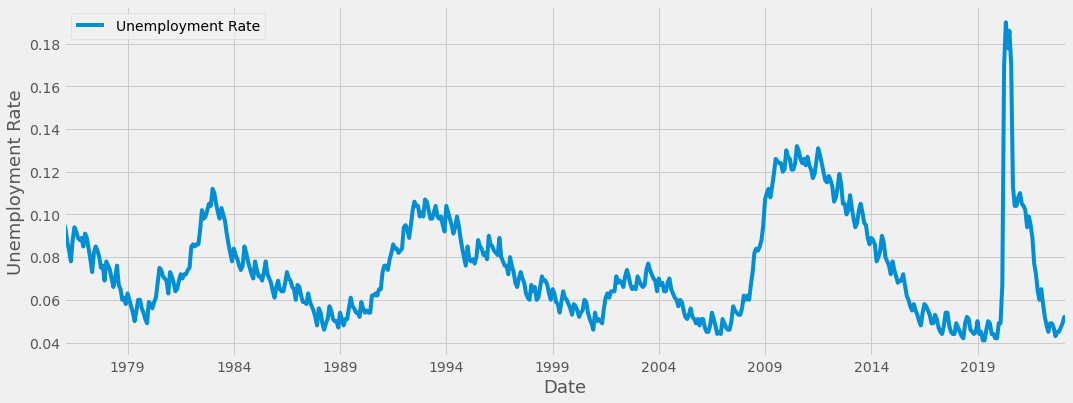

In [39]:
plot_county(Los_Angeles)

In [40]:
Los_Angeles['Unemployment Rate'].max()

0.19

Maybe a bit unsurprising but during COVID-19 the unemployment rate in Los Angeles County was 19%

### Function for county with highest unemployment and time of highest unemployment
This function is fairly straightforward and will not need a walkthrough of the functionality it provides: for the cities in our dataset what was the highest unemployment rate and when did that happen? 
<br> 

- Likely we expect most counties to have experienced their highest concentration of unemployment during COVID-19 but there may be some surprising results. 

In [41]:
# Function is fairly straight forward, in the (county) entry enter name of county to get highest
# 'Unemployment Rate'function will also return date of highest unemployment. From there we can do 
# a time study of why unemployment was so high during that time in that area. 

def U_R(county): 
    print('Highest unemployment rate: {}'.format(county['Unemployment Rate'].max()))
    print('Date of highest unemployment: {}'.format(county['Unemployment Rate'].idxmax()))

In [42]:
U_R(Los_Angeles)

Highest unemployment rate: 0.19
Date of highest unemployment: 2020-05


Great! We have a single diff function. Let's try utilizing this on the remainder of our data. 

#### Los Angeles County Education Level

As stated above, for each city we will be pulling data from the __[United States Census Bureau](https://www.census.gov/)__
<img src='pics/la_county.png'> <br> 



#### In consideration of COVID-19

We anticipate that the pandemic will have altered the unemployment rate of most of the cities in our dataset. That said, we will take unemployment rate data from our most current data, as well as data that has been established prior to the pandemic. For the sake of our analysis we will use the data prior to shelter in place orders in order to get the best representative data. 

In [43]:
# Because we are going to make some predictions on this 
# information, let's make a new set of data for city_education
# We will include a binary classifier for unemployment rate
# 0 being outside the pandemic, 1 being in it. The significance
# is that 0 implies that education level is lower than the average
# 1 being above. 

LA_edu = {'County': ['Los Angeles'],
                   'High School Grad': [80.9], 
                   '4 Year College Degree': [34.0], 
                   'Highest Unemployment Rate': [13.2],
                   'Highest UR was during Pandemic': [1],
                   '2017 Census of Agriculture Rank(Crops)': [31]}

county_ed = pd.DataFrame(data = LA_edu)
county_ed.head()

County  High School Grad  4 Year College Degree  \
0  Los Angeles              80.9                   34.0   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
0                       13.2                               1   

   2017 Census of Agriculture Rank(Crops)  
0                                      31

Information on the final column in our dataset is from the __[2017 Census of Agriculture County Profile](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06037.pdf)__ on Los Angeles County

### __[Alameda County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06001.pdf)__

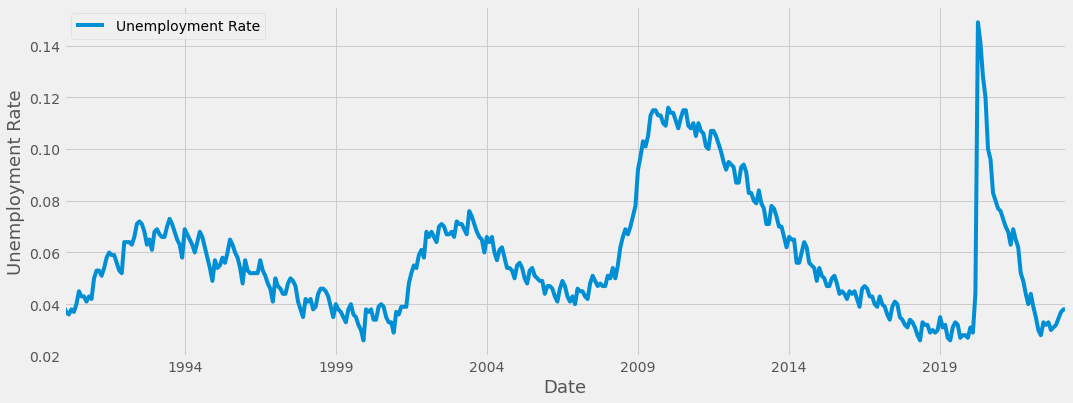

In [44]:
plot_county(Alameda)

In [45]:
U_R(Alameda)

Highest unemployment rate: 0.149
Date of highest unemployment: 2020-04


<img src='pics/alameda_county.png'> 
<br> 

Alameda county experienced their highest rate of unemployment during the pandemic as well at a rate of 14.9% in 2020. 

In [46]:
Alameda = Alameda.iloc[0:-39]
U_R(Alameda)

Highest unemployment rate: 0.11599999999999999
Date of highest unemployment: 2010-01


In [47]:
# Let's add a variable for Alameda County and the information from 
# the US Census

# Function to add county information to new table county_edu

def ed(county, high_school, college, unemployment, pandemic, rank): 
    county_ed.loc[len(county_ed.index)] = [county, 
                                           high_school, 
                                           college, 
                                           unemployment, 
                                           pandemic,
                                           rank
                                           ]

In [48]:
# Call on the above function and make sure that our 'city'
# entry is entered as a string. We will also only store 
# unemplyment rate data prior to 2020's pandemic
ed('Alameda', 89.0, 49.6, 11.5, 1, 41)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
0  Los Angeles              80.9                   34.0   
1      Alameda              89.0                   49.6   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
0                       13.2                               1   
1                       11.5                               1   

   2017 Census of Agriculture Rank(Crops)  
0                                      31  
1                                      41

### __[San Bernardino County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06071.pdf)__

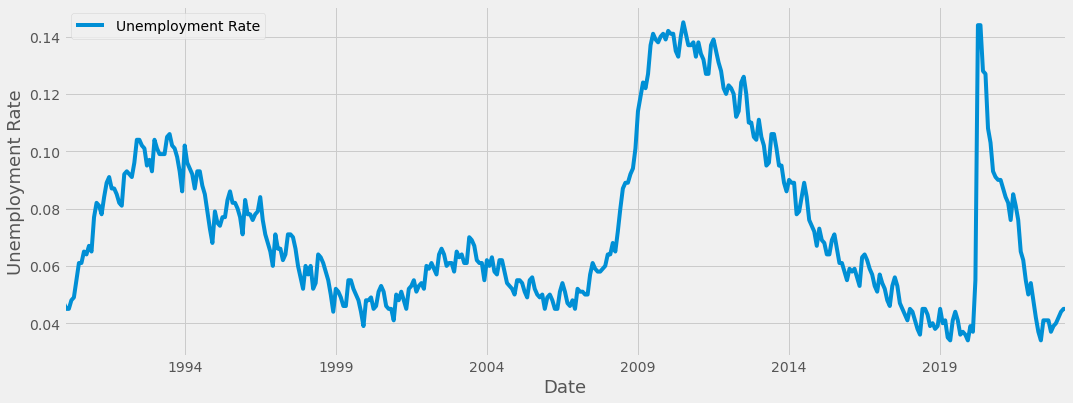

In [49]:
plot_county(San_Bernardino)

In [50]:
U_R(San_Bernardino)

Highest unemployment rate: 0.145
Date of highest unemployment: 2010-07


<img src='pics/san_bernardino_county.png'>
San Bernardino county experienced their highest rate of unemployment outside of the pandemic, in 2010 it rose to 14.5%. 

In [51]:
ed('San Bernardino', 81.1, 21.9, 14.5, 0, 33)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
0     Los Angeles              80.9                   34.0   
1         Alameda              89.0                   49.6   
2  San Bernardino              81.1                   21.9   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
0                       13.2                               1   
1                       11.5                               1   
2                       14.5                               0   

   2017 Census of Agriculture Rank(Crops)  
0                                      31  
1                                      41  
2                                      33

### __[Riverside County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06065.pdf)__

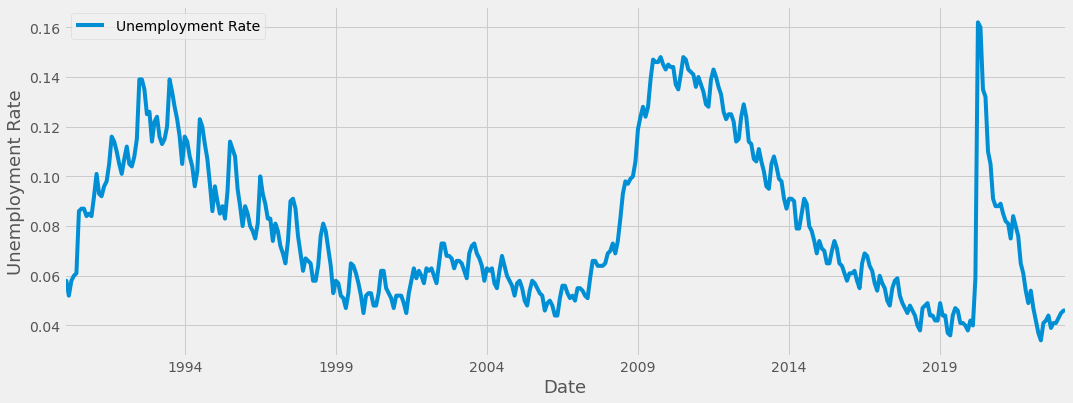

In [52]:
plot_county(Riverside)

In [53]:
U_R(Riverside)

Highest unemployment rate: 0.162
Date of highest unemployment: 2020-04


In [54]:
Riverside = Riverside.iloc[0:-39]
U_R(Riverside)

Highest unemployment rate: 0.14800000000000002
Date of highest unemployment: 2009-10


<img src = 'pics/riverside_county.png'><br> 

Riverside County experienced a 16.2% unemployment rate during the quarantine and a 14.8% prior to that in 2009. 

In [55]:
# Call on edu function and input values 
ed('Riverside', 83.0, 23.5, 14.8, 1, 14)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
0     Los Angeles              80.9                   34.0   
1         Alameda              89.0                   49.6   
2  San Bernardino              81.1                   21.9   
3       Riverside              83.0                   23.5   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
0                       13.2                               1   
1                       11.5                               1   
2                       14.5                               0   
3                       14.8                               1   

   2017 Census of Agriculture Rank(Crops)  
0                                      31  
1                                      41  
2                                      33  
3                                      14

### __[Placer County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06061.pdf)__

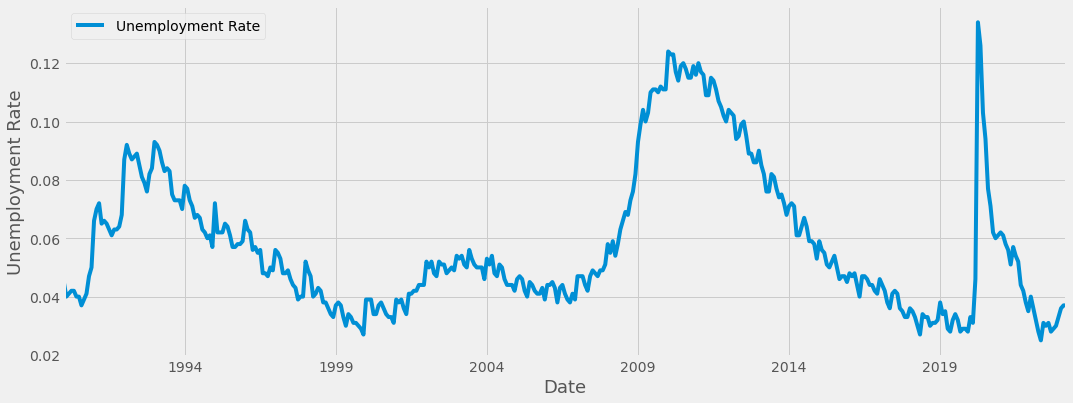

In [56]:
plot_county(Placer)

In [57]:
U_R(Placer)

Highest unemployment rate: 0.134
Date of highest unemployment: 2020-04


In [58]:
Placer = Placer.iloc[0:-38]
U_R(Placer)

Highest unemployment rate: 0.124
Date of highest unemployment: 2010-01


<img src='pics/placer_county.png'>

During the pandemic Placer County's rate of unemployment was 13.4% in 2020 and 12.4% in 2010, prior to the pandemic. 

In [59]:
ed('Placer', 94.8, 41.6, 12.4, 1, 40)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
0     Los Angeles              80.9                   34.0   
1         Alameda              89.0                   49.6   
2  San Bernardino              81.1                   21.9   
3       Riverside              83.0                   23.5   
4          Placer              94.8                   41.6   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
0                       13.2                               1   
1                       11.5                               1   
2                       14.5                               0   
3                       14.8                               1   
4                       12.4                               1   

   2017 Census of Agriculture Rank(Crops)  
0                                      31  
1                                      41  
2                                      33  
3                                      14  
4                                      40

### __[Siskiyou County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06093.pdf)__

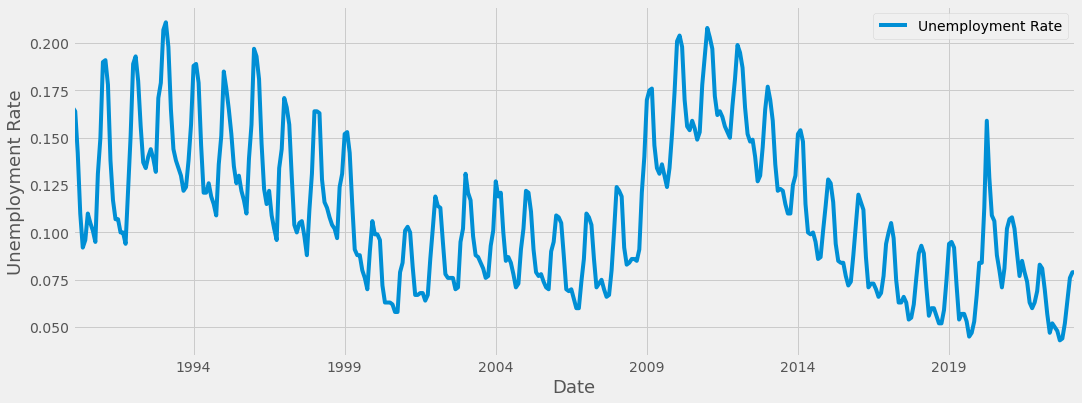

In [60]:
plot_county(Siskiyou)

In [61]:
U_R(Siskiyou)

Highest unemployment rate: 0.21100000000000002
Date of highest unemployment: 1993-02


<img src='pics/siskiyou_county.png'>

In 1993 Siskiyou County's rate of unemployment hit a high of 21.1%

In [62]:
ed('Siskiyou', 89.9, 21.5, 21.1, 0, 29)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
1         Alameda              89.0                   49.6   
2  San Bernardino              81.1                   21.9   
3       Riverside              83.0                   23.5   
4          Placer              94.8                   41.6   
5        Siskiyou              89.9                   21.5   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
1                       11.5                               1   
2                       14.5                               0   
3                       14.8                               1   
4                       12.4                               1   
5                       21.1                               0   

   2017 Census of Agriculture Rank(Crops)  
1                                      41  
2                                      33  
3                                      14  
4                                      40  
5                                      29

### __[Madera County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06039.pdf)__

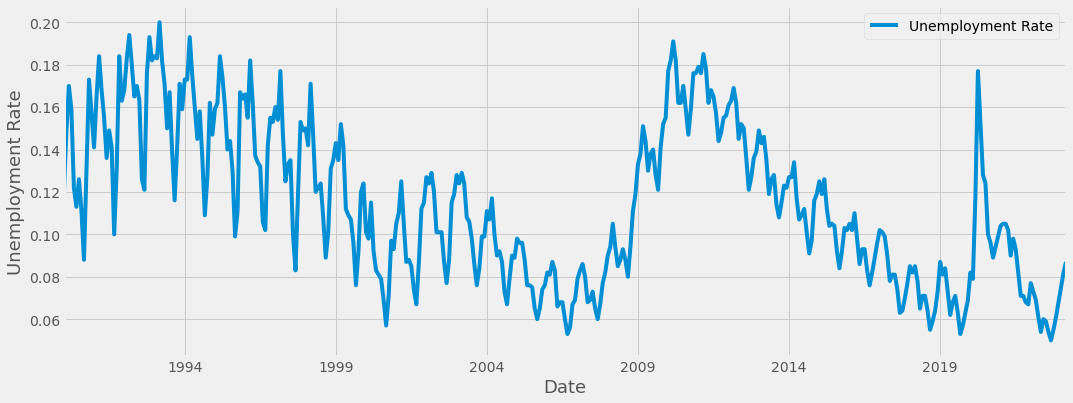

In [63]:
plot_county(Madera)

In [64]:
U_R(Madera)

Highest unemployment rate: 0.2
Date of highest unemployment: 1993-03


#### Madera explored

According to the __[Madera County's website](https://centralcalifornia.org/location-advantages/madera-county/)__ "Madera County is home to over 100 manufacturing companies with a high concentration of food manufacturing and packaging facilities. Major operations include: Gallo Winery, Ardagh Glass, Baltimore Aircoil, Certainteed Corp., JBT Food Tech, Evapco West, Warnock Foods, Azteca Milling, Oldcastle Enclosure Solutions and Georgia Pacific. Madera County is also a natural fit for distribution as the geographical center of California." <br> 

Madera it would seem also suffered the same ilk that El Centro did during 1992. <img src = 'photos/manufacturing jobs.png'><br> <center>https://www.bls.gov/opub/mlr/1993/02/art1full.pdf, page 7</center> <br> 

<img src='pics/madera_county.png'> <br> 



In [65]:
ed('Madera', 71.8, 16.4, 20.0, 0, 11)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
2  San Bernardino              81.1                   21.9   
3       Riverside              83.0                   23.5   
4          Placer              94.8                   41.6   
5        Siskiyou              89.9                   21.5   
6          Madera              71.8                   16.4   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
2                       14.5                               0   
3                       14.8                               1   
4                       12.4                               1   
5                       21.1                               0   
6                       20.0                               0   

   2017 Census of Agriculture Rank(Crops)  
2                                      33  
3                                      14  
4                                      40  
5                                      29  
6                                      11

### __[El Dorado County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06017.pdf)__

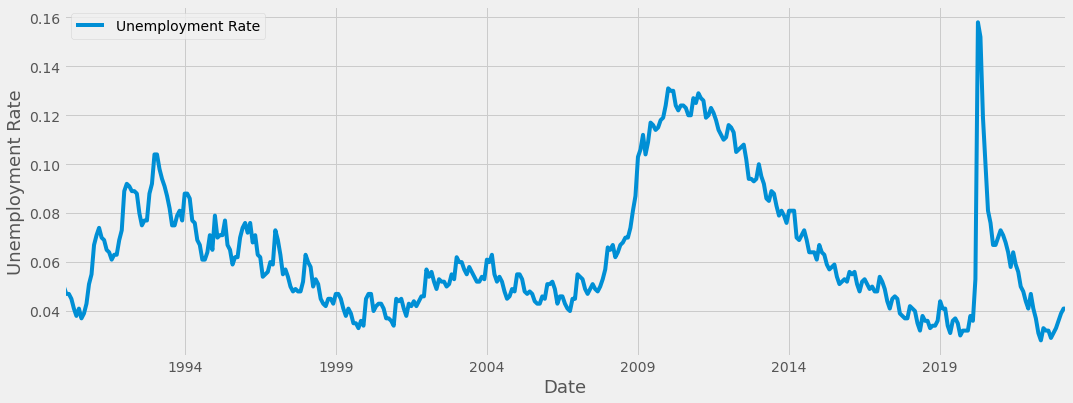

In [66]:
plot_county(El_Dorado)

In [67]:
U_R(El_Dorado)

Highest unemployment rate: 0.158
Date of highest unemployment: 2020-04


In [68]:
El_Dorado = El_Dorado.iloc[0:-38]
U_R(El_Dorado)

Highest unemployment rate: 0.131
Date of highest unemployment: 2010-01


<img src = 'pics/el_dorado_county.png'>
During the pandemic El Dorado County's rate of unemployment was 15.8%; outside of the pandemic the county's highest rate of unemployment was in 2010 at 13.1%

In [69]:
ed('El Dorado', 94.7, 36.8, 13.1, 1, 44)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
3  Riverside              83.0                   23.5   
4     Placer              94.8                   41.6   
5   Siskiyou              89.9                   21.5   
6     Madera              71.8                   16.4   
7  El Dorado              94.7                   36.8   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
3                       14.8                               1   
4                       12.4                               1   
5                       21.1                               0   
6                       20.0                               0   
7                       13.1                               1   

   2017 Census of Agriculture Rank(Crops)  
3                                      14  
4                                      40  
5                                      29  
6                                      11  
7                                      44

### __[Calaveras County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06009.pdf)__

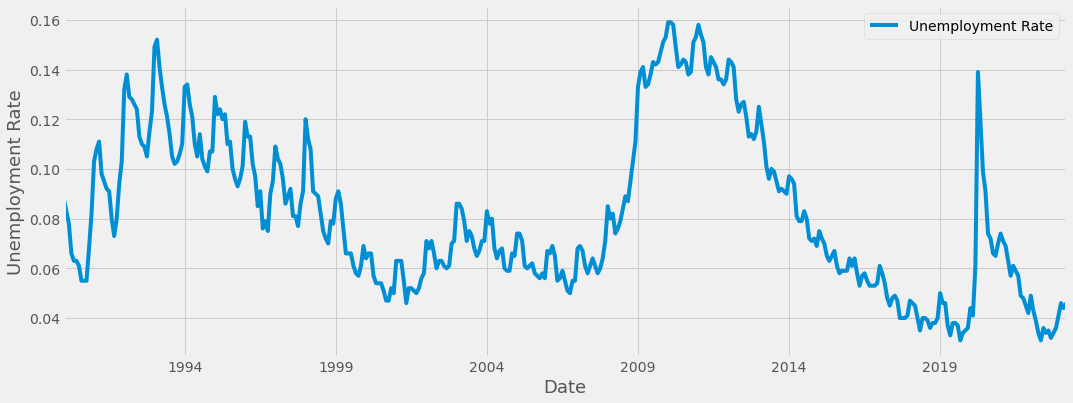

In [70]:
plot_county(Calaveras)

In [71]:
U_R(Calaveras)

Highest unemployment rate: 0.159
Date of highest unemployment: 2010-02



<img src='pics/calaveras_county.png'><br>

In 2010 Calaveras County's rate of unemployment was 15.9%

In [72]:
ed('Calaveras', 90.8, 19.9, 15.9, 0, 48)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
4     Placer              94.8                   41.6   
5   Siskiyou              89.9                   21.5   
6     Madera              71.8                   16.4   
7  El Dorado              94.7                   36.8   
8  Calaveras              90.8                   19.9   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
4                       12.4                               1   
5                       21.1                               0   
6                       20.0                               0   
7                       13.1                               1   
8                       15.9                               0   

   2017 Census of Agriculture Rank(Crops)  
4                                      40  
5                                      29  
6                                      11  
7                                      44  
8                                      48

### __[Sutter County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06101.pdf)__

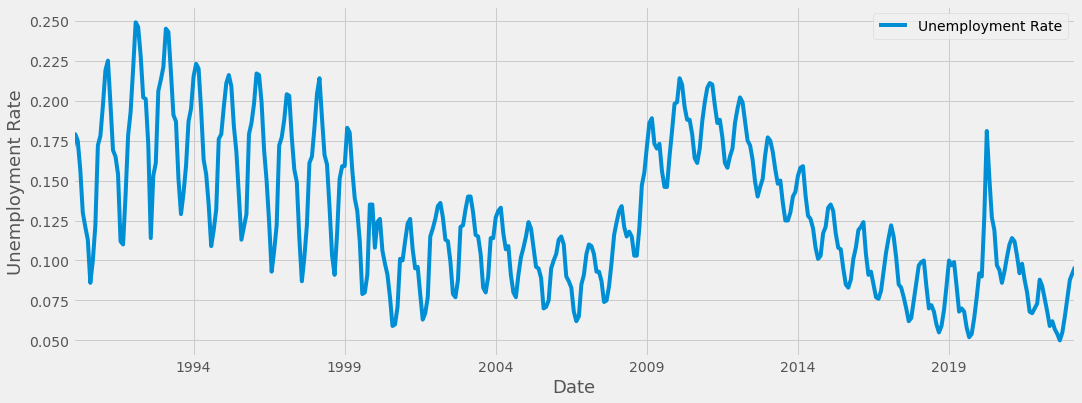

In [73]:
plot_county(Sutter)

In [74]:
U_R(Sutter)

Highest unemployment rate: 0.249
Date of highest unemployment: 1992-02



<img src='pics/sutter_county.png'>
Sutter County's highest rate of unemployment was in 1992 at 24.9%

In [75]:
ed('Sutter', 79.6, 20.0, 24.9, 0, 23)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
5   Siskiyou              89.9                   21.5   
6     Madera              71.8                   16.4   
7  El Dorado              94.7                   36.8   
8  Calaveras              90.8                   19.9   
9     Sutter              79.6                   20.0   

   Highest Unemployment Rate  Highest UR was during Pandemic  \
5                       21.1                               0   
6                       20.0                               0   
7                       13.1                               1   
8                       15.9                               0   
9                       24.9                               0   

   2017 Census of Agriculture Rank(Crops)  
5                                      29  
6                                      11  
7                                      44  
8                                      48  
9                                      23

### __[Colusa County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06011.pdf)__

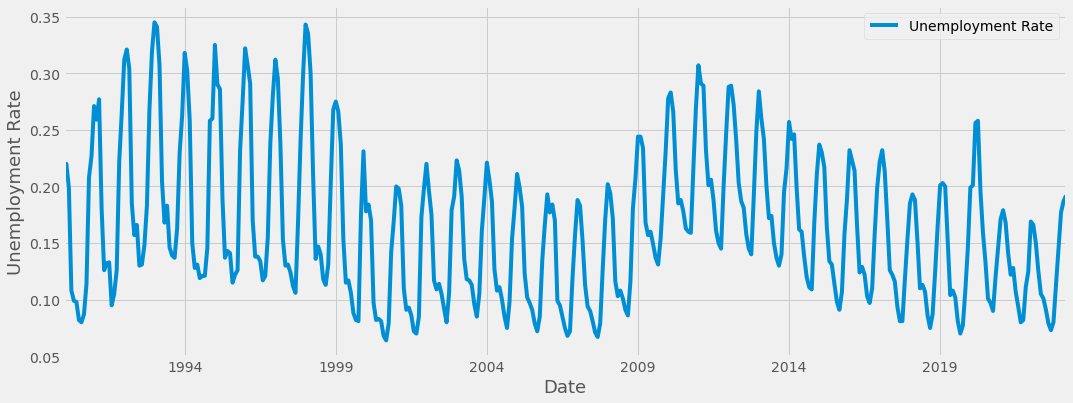

In [76]:
plot_county(Colusa)

In [77]:
U_R(Colusa)

Highest unemployment rate: 0.345
Date of highest unemployment: 1993-01


<img src='pics/colusa_county.png'>

Colusa County's highest rate of unemployment was 34.5% in 1993. 

In [78]:
ed('Colusa', 73.3, 14.7, 34.5, 0, 20)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
6      Madera              71.8                   16.4   
7   El Dorado              94.7                   36.8   
8   Calaveras              90.8                   19.9   
9      Sutter              79.6                   20.0   
10     Colusa              73.3                   14.7   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
6                        20.0                               0   
7                        13.1                               1   
8                        15.9                               0   
9                        24.9                               0   
10                       34.5                               0   

    2017 Census of Agriculture Rank(Crops)  
6                                       11  
7                                       44  
8                                       48  
9                                       23  
10                                      20

### __[Butte County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06007.pdf)__

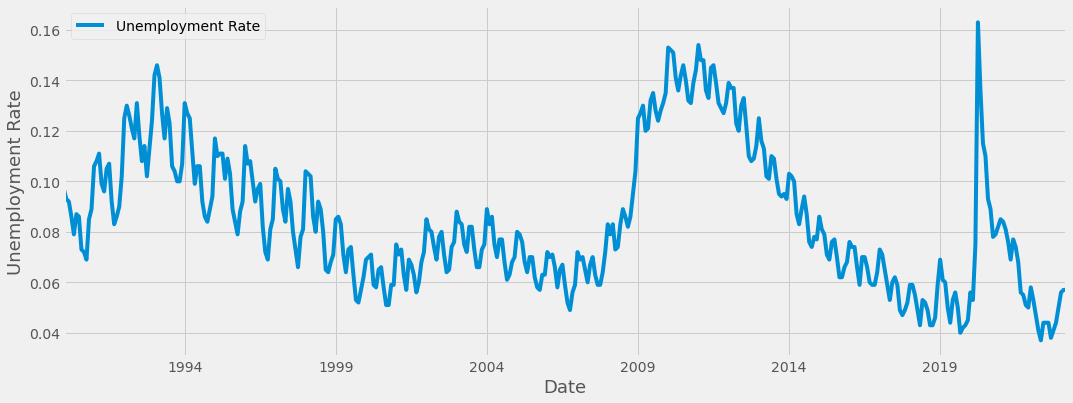

In [79]:
plot_county(Butte)

In [80]:
U_R(Butte)

Highest unemployment rate: 0.163
Date of highest unemployment: 2020-04


In [81]:
Butte = Butte.iloc[0:-38]
U_R(Butte)

Highest unemployment rate: 0.154
Date of highest unemployment: 2011-01


<img src='pics/butte_county.png'>

Butte County experienced their highest rate of unemployment during the pandemic in 2020 at 16.3% but prior to that in 2011 at 15.4%

In [82]:
ed('Butte', 73.3, 14.7, 15.4, 1, 22)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
7   El Dorado              94.7                   36.8   
8   Calaveras              90.8                   19.9   
9      Sutter              79.6                   20.0   
10     Colusa              73.3                   14.7   
11      Butte              73.3                   14.7   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
7                        13.1                               1   
8                        15.9                               0   
9                        24.9                               0   
10                       34.5                               0   
11                       15.4                               1   

    2017 Census of Agriculture Rank(Crops)  
7                                       44  
8                                       48  
9                                       23  
10                                      20  
11                                      22

### __[Lake County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06033.pdf)__

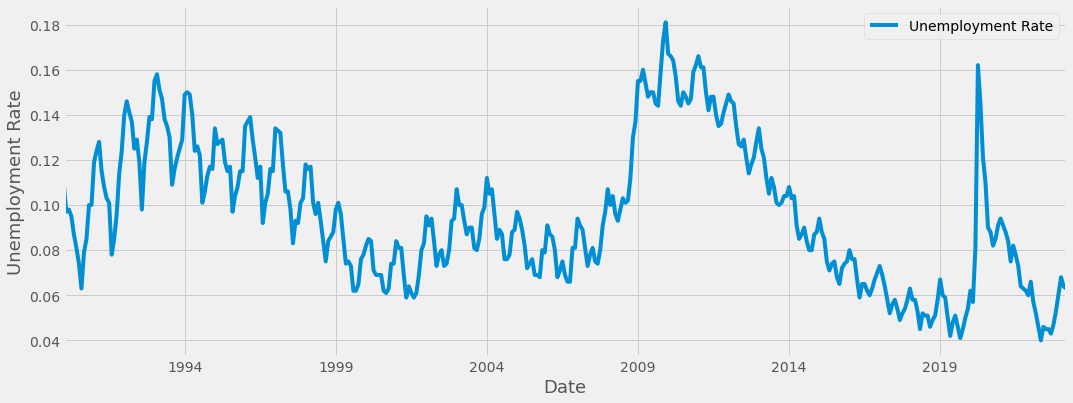

In [83]:
plot_county(Lake)

In [84]:
U_R(Lake)

Highest unemployment rate: 0.18100000000000002
Date of highest unemployment: 2009-12


<img src = 'pics/lake_county.png'>

Lake County experienced their highest rate of unemployment in 2009 at 18.1%

In [85]:
ed('Lake', 86.6, 17.5, 18.1, 0, 38)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
8   Calaveras              90.8                   19.9   
9      Sutter              79.6                   20.0   
10     Colusa              73.3                   14.7   
11      Butte              73.3                   14.7   
12       Lake              86.6                   17.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
8                        15.9                               0   
9                        24.9                               0   
10                       34.5                               0   
11                       15.4                               1   
12                       18.1                               0   

    2017 Census of Agriculture Rank(Crops)  
8                                       48  
9                                       23  
10                                      20  
11                                      22  
12                                      38

### __[Yuba County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06115.pdf)__

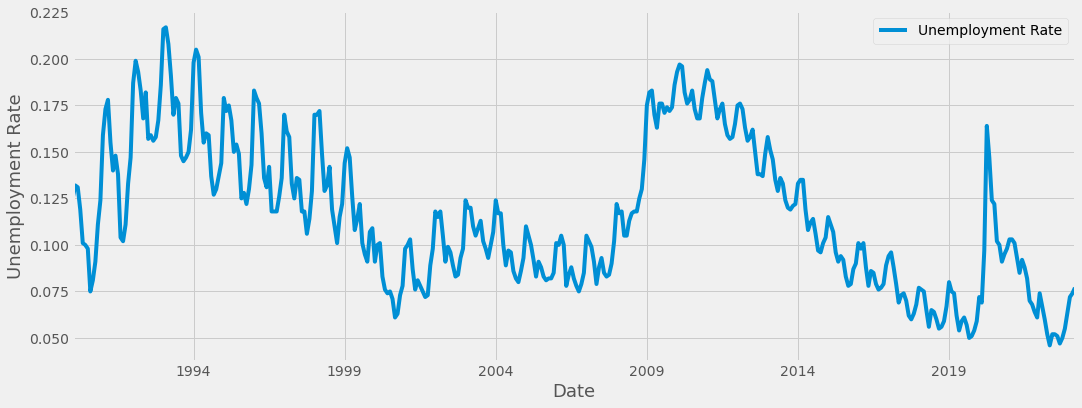

In [86]:
plot_county(Yuba)

In [87]:
U_R(Yuba)

Highest unemployment rate: 0.217
Date of highest unemployment: 1993-02




<img src='pics/yuba_county.png'>
<br> 

Yuba County experienced a 21.7% rate of unemployment in 1993. 


In [88]:
ed('Yuba', 81.2, 17.7, 21.7, 0, 28)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
9   Sutter              79.6                   20.0   
10  Colusa              73.3                   14.7   
11   Butte              73.3                   14.7   
12    Lake              86.6                   17.5   
13    Yuba              81.2                   17.7   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
9                        24.9                               0   
10                       34.5                               0   
11                       15.4                               1   
12                       18.1                               0   
13                       21.7                               0   

    2017 Census of Agriculture Rank(Crops)  
9                                       23  
10                                      20  
11                                      22  
12                                      38  
13                                      28

### __[Del Norte County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06015.pdf)__

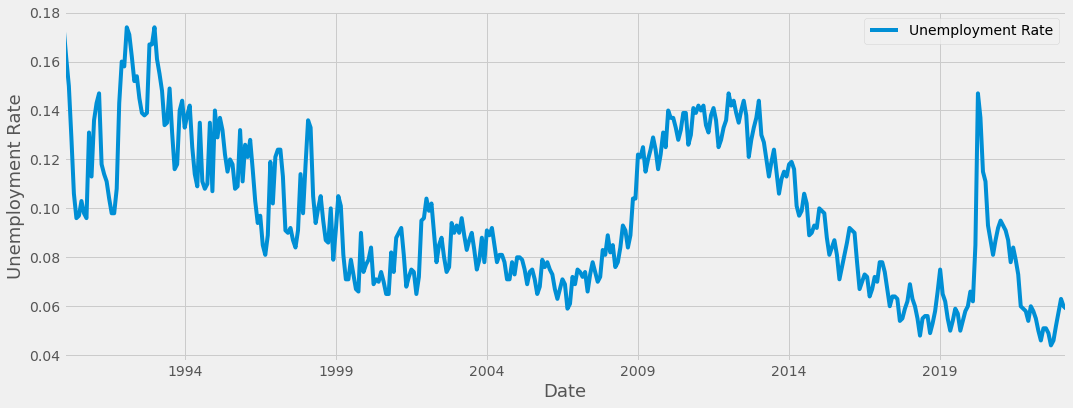

In [89]:
plot_county(Del_Norte)

In [90]:
U_R(Del_Norte)

Highest unemployment rate: 0.174
Date of highest unemployment: 1992-02


In 1992 the rate of unemployment was 17.4% in Del Norte County

<img src='pics/del_norte_county.png'>

In [91]:
ed('Del Norte', 80.6, 16.1, 17.4, 0, 46)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
10     Colusa              73.3                   14.7   
11      Butte              73.3                   14.7   
12       Lake              86.6                   17.5   
13       Yuba              81.2                   17.7   
14  Del Norte              80.6                   16.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
10                       34.5                               0   
11                       15.4                               1   
12                       18.1                               0   
13                       21.7                               0   
14                       17.4                               0   

    2017 Census of Agriculture Rank(Crops)  
10                                      20  
11                                      22  
12                                      38  
13                                      28  
14                                      46

### __[Yolo County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06113.pdf)__

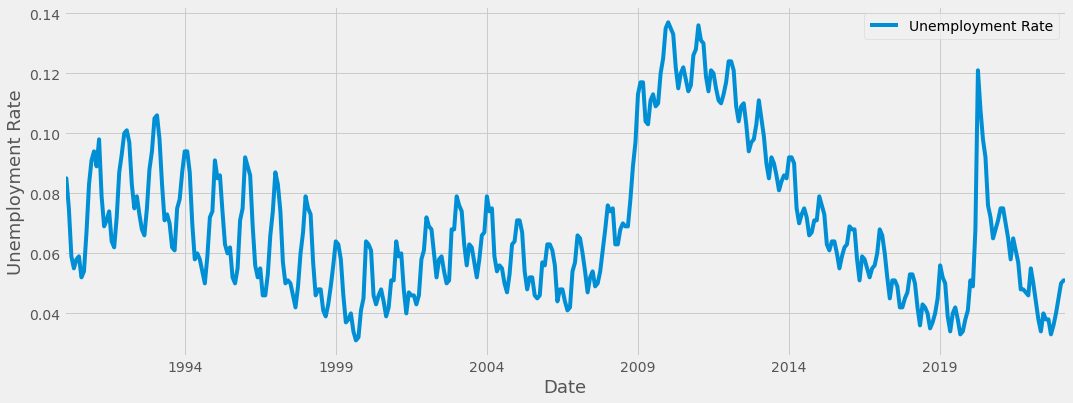

In [92]:
plot_county(Yolo)

In [93]:
U_R(Yolo)

Highest unemployment rate: 0.13699999999999998
Date of highest unemployment: 2010-01



<img src='pics/yolo_county.png'> <br> 

Yolo County experienced a 13.7% rate of unemployment in 2010.




In [94]:
ed('Yolo', 87.6, 43.1, 13.7, 0, 19)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
11      Butte              73.3                   14.7   
12       Lake              86.6                   17.5   
13       Yuba              81.2                   17.7   
14  Del Norte              80.6                   16.1   
15       Yolo              87.6                   43.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
11                       15.4                               1   
12                       18.1                               0   
13                       21.7                               0   
14                       17.4                               0   
15                       13.7                               0   

    2017 Census of Agriculture Rank(Crops)  
11                                      22  
12                                      38  
13                                      28  
14                                      46  
15                                      19

### __[San Diego County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06073.pdf)__

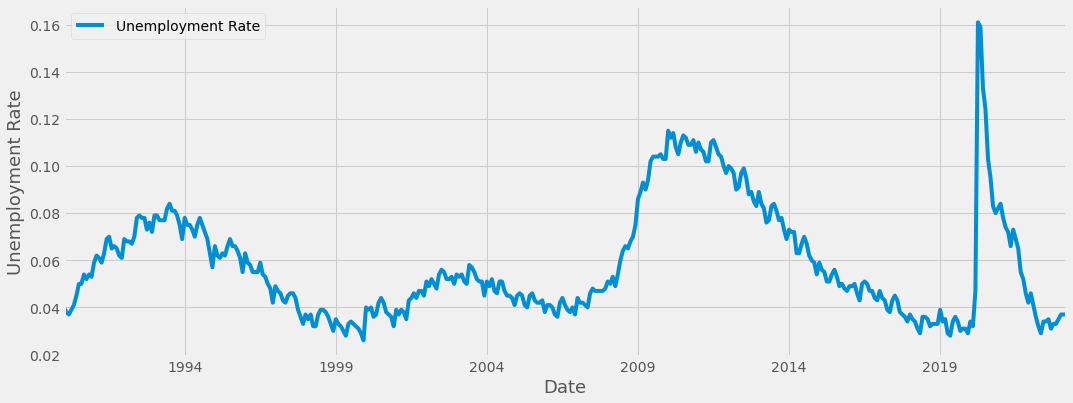

In [95]:
plot_county(San_Diego)

In [96]:
U_R(San_Diego)

Highest unemployment rate: 0.161
Date of highest unemployment: 2020-04


In [97]:
San_Diego = San_Diego.iloc[0:-38]
U_R(San_Diego)

Highest unemployment rate: 0.115
Date of highest unemployment: 2010-01


<img src='pics/san_diego_county.png'> <br> 

San Diego County experienced their highest rate of unemployment during the pandemic in 2020 at 16.1%, outside of the pandemic they experienced an 11.5% in 2010. 


In [98]:
ed('San Diego', 88.3, 40.3, 11.5, 1, 13)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
12       Lake              86.6                   17.5   
13       Yuba              81.2                   17.7   
14  Del Norte              80.6                   16.1   
15       Yolo              87.6                   43.1   
16  San Diego              88.3                   40.3   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
12                       18.1                               0   
13                       21.7                               0   
14                       17.4                               0   
15                       13.7                               0   
16                       11.5                               1   

    2017 Census of Agriculture Rank(Crops)  
12                                      38  
13                                      28  
14                                      46  
15                                      19  
16                                      13

### __[Humboldt County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06023.pdf)__

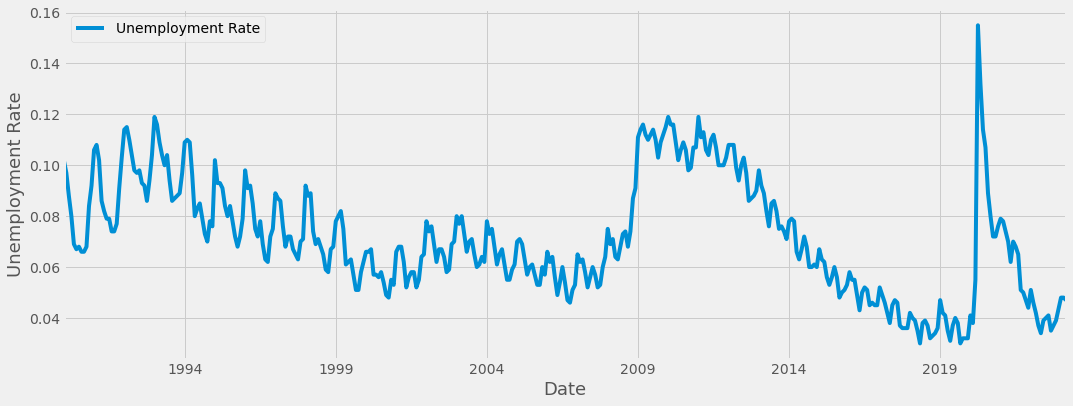

In [99]:
plot_county(Humboldt)

In [100]:
U_R(Humboldt)

Highest unemployment rate: 0.155
Date of highest unemployment: 2020-04


In [101]:
Humboldt = Humboldt.iloc[0:-39]
U_R(Humboldt)

Highest unemployment rate: 0.11900000000000001
Date of highest unemployment: 1993-01


<img src='pics/humboldt_county.png'> 

In 2020 Humboldt County had a rate of unemployment at 15.5% in 2020 and 11.9% in 1993. 

In [102]:
ed('Humboldt', 91.0, 31.2, 11.9, 1, 36)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
13       Yuba              81.2                   17.7   
14  Del Norte              80.6                   16.1   
15       Yolo              87.6                   43.1   
16  San Diego              88.3                   40.3   
17   Humboldt              91.0                   31.2   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
13                       21.7                               0   
14                       17.4                               0   
15                       13.7                               0   
16                       11.5                               1   
17                       11.9                               1   

    2017 Census of Agriculture Rank(Crops)  
13                                      28  
14                                      46  
15                                      19  
16                                      13  
17                                      36

### __[Amador County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06005.pdf)__

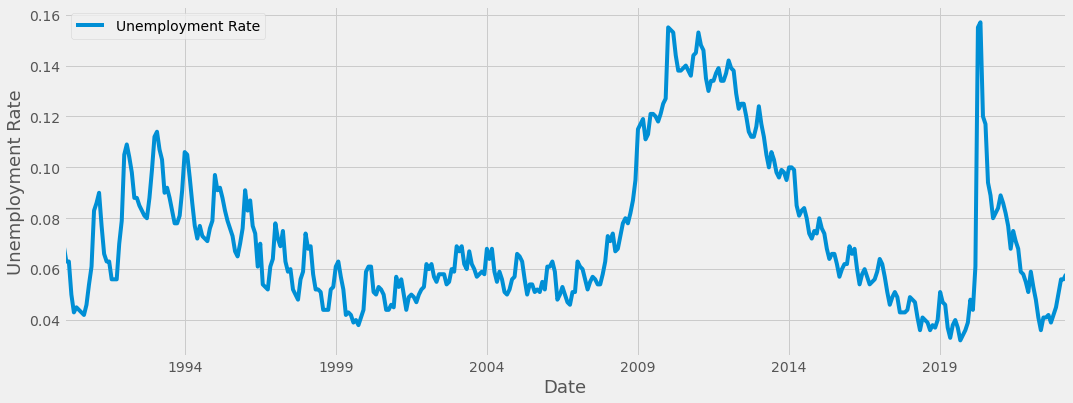

In [103]:
plot_county(Amador)

In [104]:
U_R(Amador)

Highest unemployment rate: 0.157
Date of highest unemployment: 2020-05


In [105]:
Amador = Amador.iloc[0:-38]
U_R(Amador)

Highest unemployment rate: 0.155
Date of highest unemployment: 2010-01


<img src='pics/amador_county.png'>
<br> 

Amador County experienced their highest rate of unemployment in 2020 at 15.7, but nearly an identical rate of 15.5% in 2010. 


In [106]:
ed('Amador', 91.3, 19.5, 15.5, 1, 42)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
14  Del Norte              80.6                   16.1   
15       Yolo              87.6                   43.1   
16  San Diego              88.3                   40.3   
17   Humboldt              91.0                   31.2   
18     Amador              91.3                   19.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
14                       17.4                               0   
15                       13.7                               0   
16                       11.5                               1   
17                       11.9                               1   
18                       15.5                               1   

    2017 Census of Agriculture Rank(Crops)  
14                                      46  
15                                      19  
16                                      13  
17                                      36  
18                                      42

### __[Glenn County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06021.pdf)__

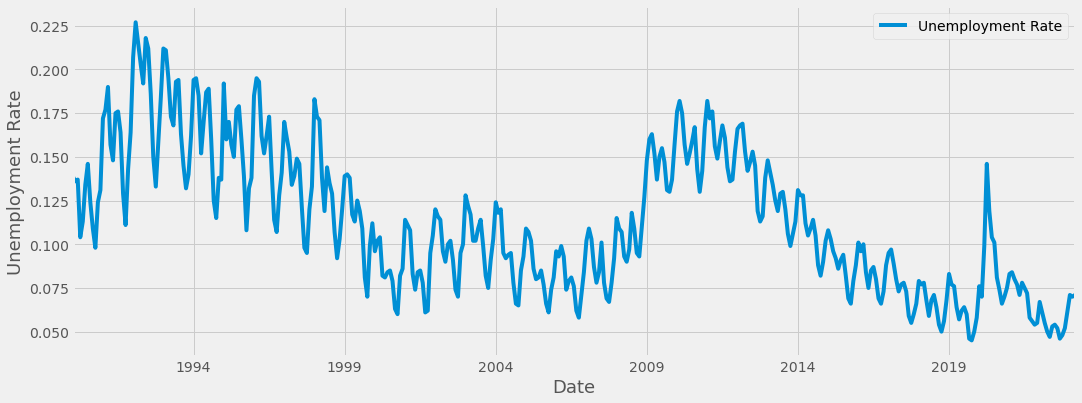

In [107]:
plot_county(Glenn)

In [108]:
U_R(Glenn)

Highest unemployment rate: 0.22699999999999998
Date of highest unemployment: 1992-02


<img src='pics/glenn_county.png'><br>

Glenn County experienced their highest rate of unemployment in 1992 at 22.7%

In [109]:
ed('Glenn', 76.5, 14.9, 22.7, 0, 21)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
15       Yolo              87.6                   43.1   
16  San Diego              88.3                   40.3   
17   Humboldt              91.0                   31.2   
18     Amador              91.3                   19.5   
19      Glenn              76.5                   14.9   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
15                       13.7                               0   
16                       11.5                               1   
17                       11.9                               1   
18                       15.5                               1   
19                       22.7                               0   

    2017 Census of Agriculture Rank(Crops)  
15                                      19  
16                                      13  
17                                      36  
18                                      42  
19                                      21

### __[Mono County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06051.pdf)__

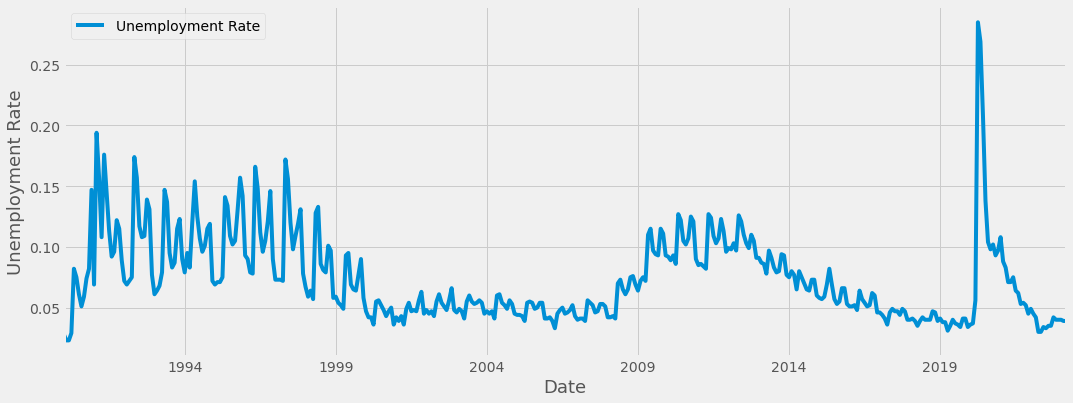

In [110]:
plot_county(Mono)

In [111]:
U_R(Mono)

Highest unemployment rate: 0.285
Date of highest unemployment: 2020-04


In [112]:
Mono = Mono.iloc[0:-38]
U_R(Mono)

Highest unemployment rate: 0.19399999999999998
Date of highest unemployment: 1991-02


<img src='pics/mono_county.png'>
<br> 

Mono County experienced their highest rate of unemployment during the pandemic at 28.5% and in 1991 at 19.4%. 

In [113]:
ed('Mono', 87.2, 29.5, 19.4, 1, 50)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
16  San Diego              88.3                   40.3   
17   Humboldt              91.0                   31.2   
18     Amador              91.3                   19.5   
19      Glenn              76.5                   14.9   
20       Mono              87.2                   29.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
16                       11.5                               1   
17                       11.9                               1   
18                       15.5                               1   
19                       22.7                               0   
20                       19.4                               1   

    2017 Census of Agriculture Rank(Crops)  
16                                      13  
17                                      36  
18                                      42  
19                                      21  
20                                      50

### __[Ventura County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06111.pdf)__

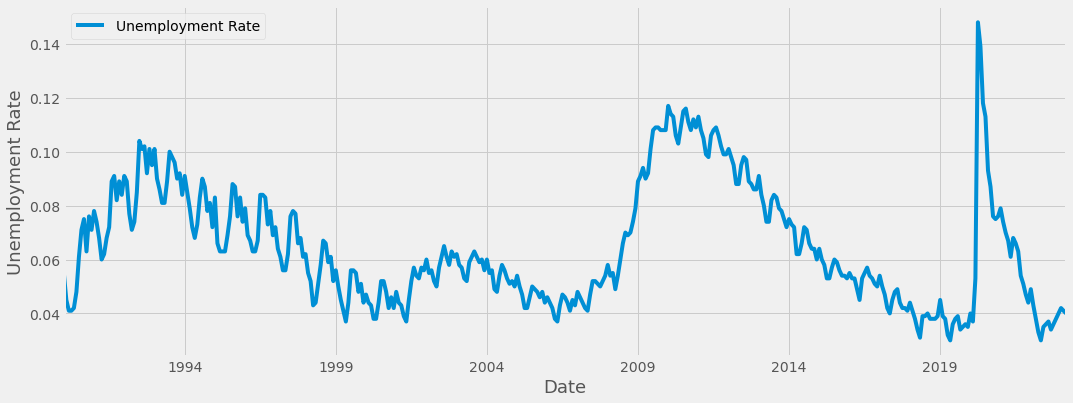

In [114]:
plot_county(Ventura)

In [115]:
U_R(Ventura)

Highest unemployment rate: 0.14800000000000002
Date of highest unemployment: 2020-04


In [116]:
Ventura = Ventura.iloc[0:-38]
U_R(Ventura)

Highest unemployment rate: 0.11699999999999999
Date of highest unemployment: 2010-01


<img src='pics/ventura_county.png'>
<br> 

Ventura county experience their highest rate of unemployment in 2020 at 14.8% and again in 2010 at 11.7%. 
<br>



In [117]:
ed('Ventura', 85.6, 34.0, 11.7, 1, 6)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
17  Humboldt              91.0                   31.2   
18    Amador              91.3                   19.5   
19     Glenn              76.5                   14.9   
20      Mono              87.2                   29.5   
21   Ventura              85.6                   34.0   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
17                       11.9                               1   
18                       15.5                               1   
19                       22.7                               0   
20                       19.4                               1   
21                       11.7                               1   

    2017 Census of Agriculture Rank(Crops)  
17                                      36  
18                                      42  
19                                      21  
20                                      50  
21                                       6

### __[Plumas County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06063.pdf)__

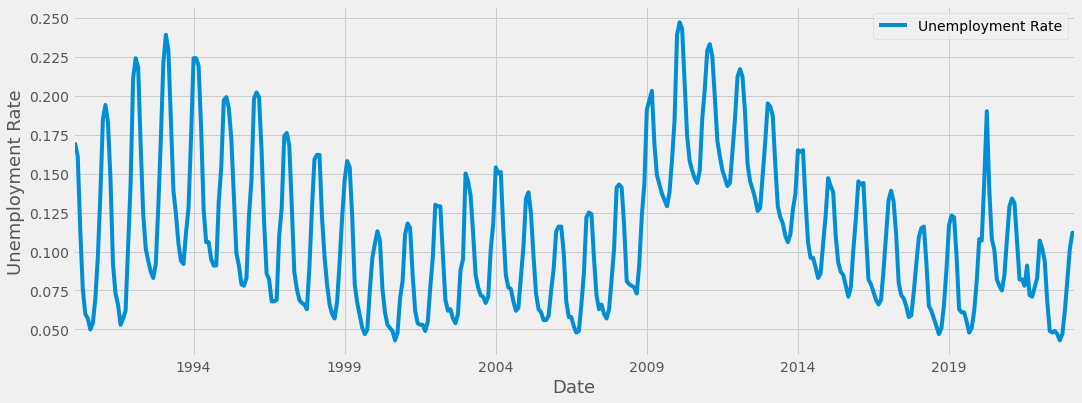

In [118]:
plot_county(Plumas)

In [119]:
U_R(Plumas)

Highest unemployment rate: 0.247
Date of highest unemployment: 2010-02


<img src='pics/plumas_county.png'> 

Plumas County experienced their highest rate of unemployment in 2010 at 24.7%

In [120]:
ed('Plumas', 94.6, 23.0, 24.7, 0, 51)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
18   Amador              91.3                   19.5   
19    Glenn              76.5                   14.9   
20     Mono              87.2                   29.5   
21  Ventura              85.6                   34.0   
22   Plumas              94.6                   23.0   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
18                       15.5                               1   
19                       22.7                               0   
20                       19.4                               1   
21                       11.7                               1   
22                       24.7                               0   

    2017 Census of Agriculture Rank(Crops)  
18                                      42  
19                                      21  
20                                      50  
21                                       6  
22                                      51

### __[Solano County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06095.pdf)__

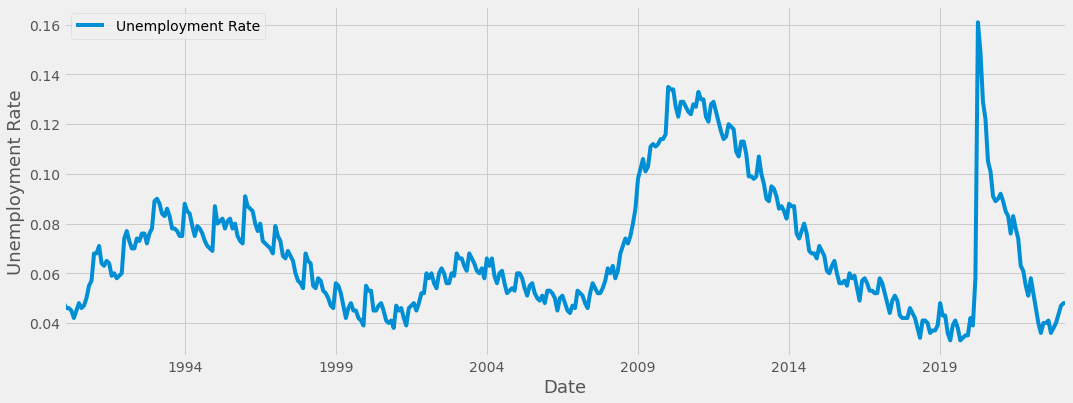

In [121]:
plot_county(Solano)

In [122]:
U_R(Solano)

Highest unemployment rate: 0.161
Date of highest unemployment: 2020-04


In [123]:
Solano = Solano.iloc[0:-38]
U_R(Solano)

Highest unemployment rate: 0.135
Date of highest unemployment: 2010-01


<img src='pics/solano_county.png'>
<br> 

Solano County's highest rate of unemployment was during the pandemic, their second highest was in 2010 at 13.5%

In [124]:
ed('Solano', 88.9, 27.8, 13.5, 1, 26)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
19    Glenn              76.5                   14.9   
20     Mono              87.2                   29.5   
21  Ventura              85.6                   34.0   
22   Plumas              94.6                   23.0   
23   Solano              88.9                   27.8   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
19                       22.7                               0   
20                       19.4                               1   
21                       11.7                               1   
22                       24.7                               0   
23                       13.5                               1   

    2017 Census of Agriculture Rank(Crops)  
19                                      21  
20                                      50  
21                                       6  
22                                      51  
23                                      26

### __[Napa County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06055.pdf)__

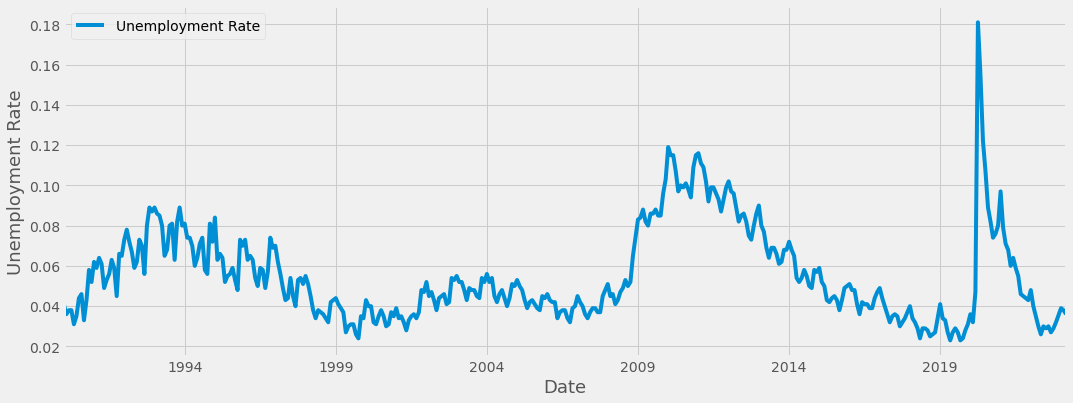

In [125]:
plot_county(Napa)

In [126]:
U_R(Napa)

Highest unemployment rate: 0.18100000000000002
Date of highest unemployment: 2020-04


In [127]:
Napa = Napa.iloc[0:-38]
U_R(Napa)

Highest unemployment rate: 0.11900000000000001
Date of highest unemployment: 2010-01


<img src='pics/napa_county.png'>
<br> 

Napa County experienced their highest rate of unemployment during the pandemic and their second highest in 2010 at 11.9%

In [128]:
ed('Napa', 85.2, 37.0, 11.9, 1, 18)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
20     Mono              87.2                   29.5   
21  Ventura              85.6                   34.0   
22   Plumas              94.6                   23.0   
23   Solano              88.9                   27.8   
24     Napa              85.2                   37.0   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
20                       19.4                               1   
21                       11.7                               1   
22                       24.7                               0   
23                       13.5                               1   
24                       11.9                               1   

    2017 Census of Agriculture Rank(Crops)  
20                                      50  
21                                       6  
22                                      51  
23                                      26  
24                                      18

### __[San Luis Obispo County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06079.pdf)__

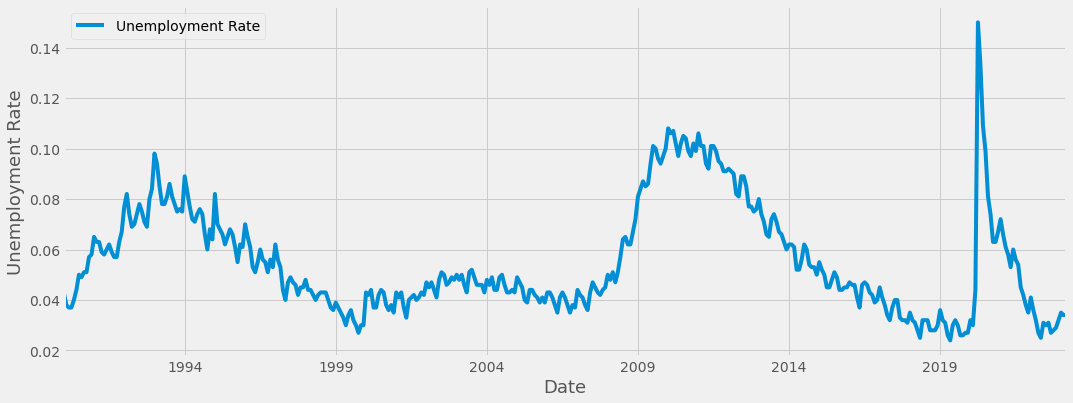

In [129]:
plot_county(San_Luis_Obispo)

In [130]:
U_R(San_Luis_Obispo)

Highest unemployment rate: 0.15
Date of highest unemployment: 2020-04


In [131]:
San_Luis_Obispo = San_Luis_Obispo.iloc[0:-38]
U_R(San_Luis_Obispo)

Highest unemployment rate: 0.10800000000000001
Date of highest unemployment: 2010-01


<img src='pics/san_luis_obispo_county.png'>
<br> 

SLO County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 10.8%

In [132]:
ed('San Luis Obispo', 91.9, 36.7, 10.8, 1, 15)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
21          Ventura              85.6                   34.0   
22           Plumas              94.6                   23.0   
23           Solano              88.9                   27.8   
24             Napa              85.2                   37.0   
25  San Luis Obispo              91.9                   36.7   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
21                       11.7                               1   
22                       24.7                               0   
23                       13.5                               1   
24                       11.9                               1   
25                       10.8                               1   

    2017 Census of Agriculture Rank(Crops)  
21                                       6  
22                                      51  
23                                      26  
24                                      18  
25                                      15

### __[Tuolumne County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06109.pdf)__

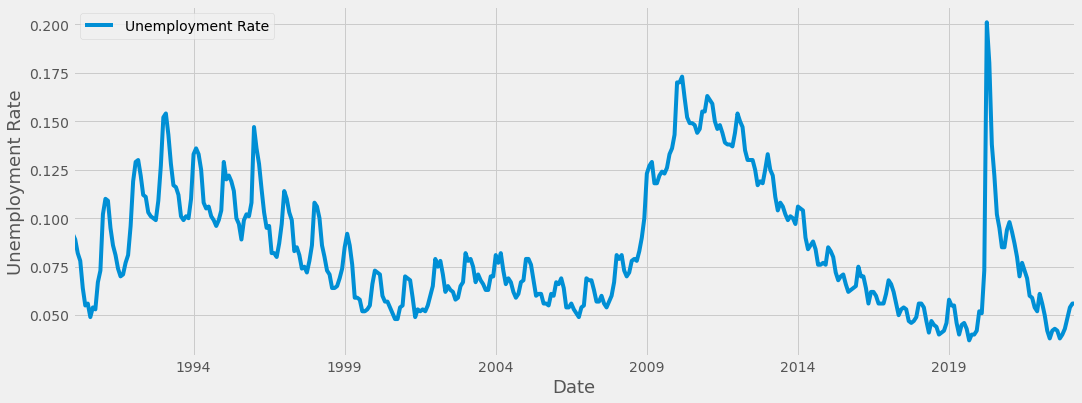

In [133]:
plot_county(Tuolumne)

In [134]:
U_R(Tuolumne)

Highest unemployment rate: 0.201
Date of highest unemployment: 2020-04


In [135]:
Tuolumne = Tuolumne.iloc[0:-38]
U_R(Tuolumne)

Highest unemployment rate: 0.17300000000000001
Date of highest unemployment: 2010-03


<img src='pics/tuolumne_county.png'>
<br> 

Tuolumne County experienced their highest rate of unemployment in the pandemic and their second in 2010 at 17.3%

In [136]:
ed('Tuolumne', 92.1, 24.6, 17.3, 1, 54)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
22           Plumas              94.6                   23.0   
23           Solano              88.9                   27.8   
24             Napa              85.2                   37.0   
25  San Luis Obispo              91.9                   36.7   
26         Tuolumne              92.1                   24.6   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
22                       24.7                               0   
23                       13.5                               1   
24                       11.9                               1   
25                       10.8                               1   
26                       17.3                               1   

    2017 Census of Agriculture Rank(Crops)  
22                                      51  
23                                      26  
24                                      18  
25                                      15  
26                                      54

### __[Alpine County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06003.pdf)__

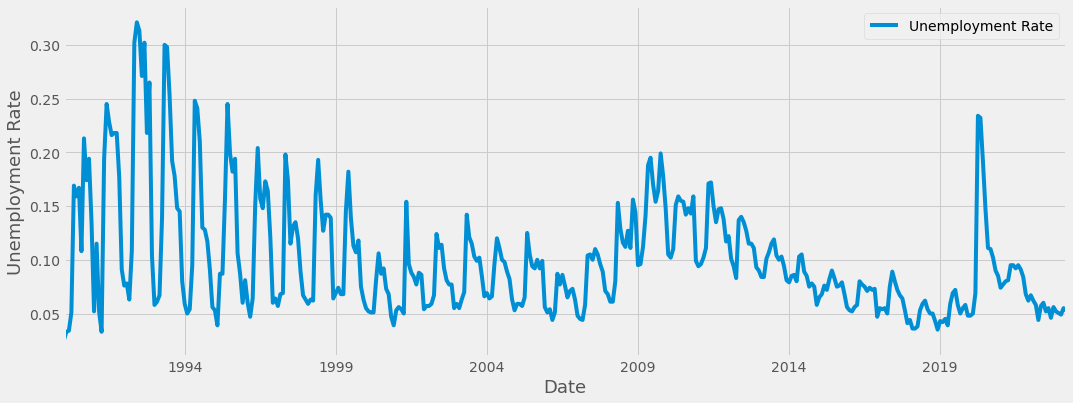

In [137]:
plot_county(Alpine)

In [138]:
U_R(Alpine)

Highest unemployment rate: 0.321
Date of highest unemployment: 1992-06


<img src='pics/alpine_county.png'>
<br> 

Alpine County experienced their highest rate of unemployement in 1992 at 32.1%

In [139]:
ed('Alpine', 93.7, 39.3, 32.1, 0, 58)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
23           Solano              88.9                   27.8   
24             Napa              85.2                   37.0   
25  San Luis Obispo              91.9                   36.7   
26         Tuolumne              92.1                   24.6   
27           Alpine              93.7                   39.3   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
23                       13.5                               1   
24                       11.9                               1   
25                       10.8                               1   
26                       17.3                               1   
27                       32.1                               0   

    2017 Census of Agriculture Rank(Crops)  
23                                      26  
24                                      18  
25                                      15  
26                                      54  
27                                      58

### __[Sierra County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06091.pdf)__

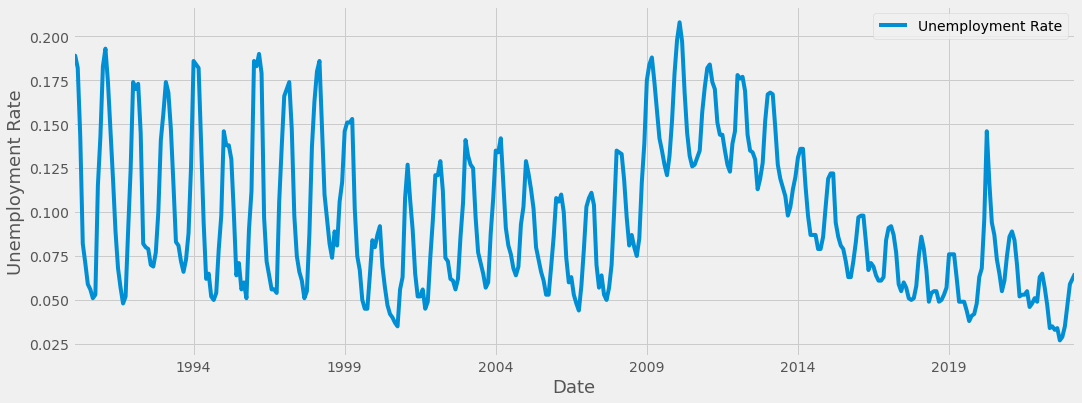

In [140]:
plot_county(Sierra)

In [141]:
U_R(Sierra)

Highest unemployment rate: 0.20800000000000002
Date of highest unemployment: 2010-02


<img src='pics/sierra_county.png'>
<br> 

SLO County experienced their highest rate of unemployement in 2010 at 20.8%

In [142]:
ed('Sierra', 94.4, 22.3, 20.8, 0, 56)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
24             Napa              85.2                   37.0   
25  San Luis Obispo              91.9                   36.7   
26         Tuolumne              92.1                   24.6   
27           Alpine              93.7                   39.3   
28           Sierra              94.4                   22.3   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
24                       11.9                               1   
25                       10.8                               1   
26                       17.3                               1   
27                       32.1                               0   
28                       20.8                               0   

    2017 Census of Agriculture Rank(Crops)  
24                                      18  
25                                      15  
26                                      54  
27                                      58  
28                                      56

### __[Tehama County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06103.pdf)__

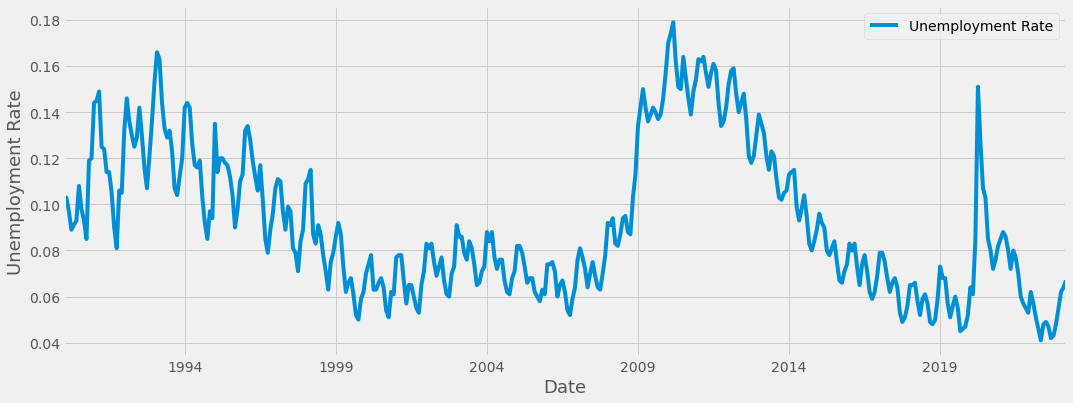

In [143]:
plot_county(Tehama)

In [144]:
U_R(Tehama)

Highest unemployment rate: 0.179
Date of highest unemployment: 2010-03


<img src='pics/tehama_county.png'>
<br> 

Tehama County experienced their highest rate of unemployement in 2010 at 17.9%

In [145]:
ed('Tehama', 85.8, 17.0, 17.9, 0, 29)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
25  San Luis Obispo              91.9                   36.7   
26         Tuolumne              92.1                   24.6   
27           Alpine              93.7                   39.3   
28           Sierra              94.4                   22.3   
29           Tehama              85.8                   17.0   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
25                       10.8                               1   
26                       17.3                               1   
27                       32.1                               0   
28                       20.8                               0   
29                       17.9                               0   

    2017 Census of Agriculture Rank(Crops)  
25                                      15  
26                                      54  
27                                      58  
28                                      56  
29                                      29

### __[Marin County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06041.pdf)__

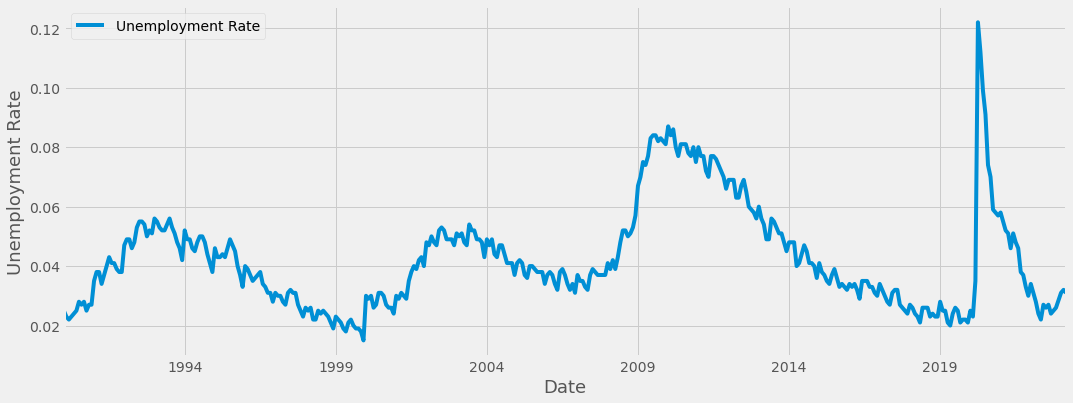

In [146]:
plot_county(Marin)

In [147]:
U_R(Marin)

Highest unemployment rate: 0.122
Date of highest unemployment: 2020-04


In [148]:
Marin = Marin.iloc[0:-38]
U_R(Marin)

Highest unemployment rate: 0.087
Date of highest unemployment: 2010-01


<img src='pics/marin_county.png'>
<br> 

Marin County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 8.7%

In [149]:
ed('Marin', 93.4, 60.1, 8.7, 1, 47)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
26  Tuolumne              92.1                   24.6   
27    Alpine              93.7                   39.3   
28    Sierra              94.4                   22.3   
29    Tehama              85.8                   17.0   
30     Marin              93.4                   60.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
26                       17.3                               1   
27                       32.1                               0   
28                       20.8                               0   
29                       17.9                               0   
30                        8.7                               1   

    2017 Census of Agriculture Rank(Crops)  
26                                      54  
27                                      58  
28                                      56  
29                                      29  
30                                      47

### __[Trinity County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06105.pdf)__

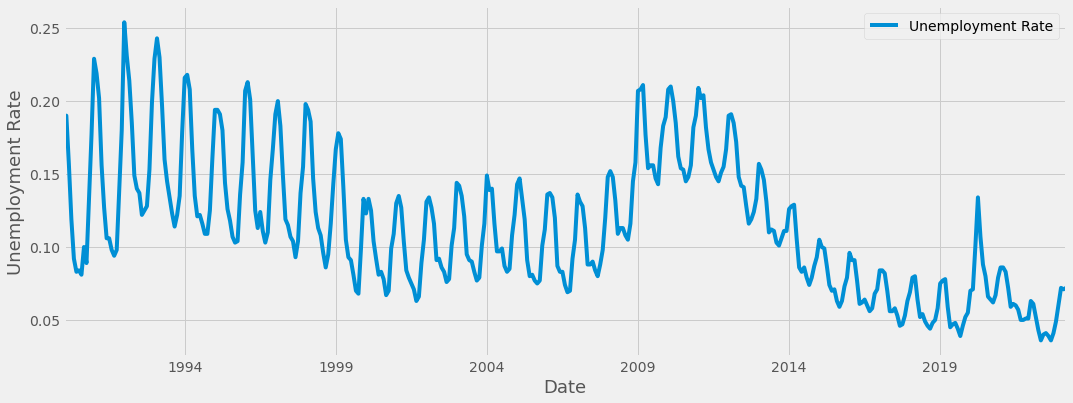

In [150]:
plot_county(Trinity)

In [151]:
U_R(Trinity)

Highest unemployment rate: 0.254
Date of highest unemployment: 1992-01


<img src='pics/trinity_county.png'>
<br> 

Trinity County experienced their highest rate of unemployement in 1992 at 25.4%

In [152]:
ed('Trinity', 93.9, 18.6, 25.4, 0, 55)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
27   Alpine              93.7                   39.3   
28   Sierra              94.4                   22.3   
29   Tehama              85.8                   17.0   
30    Marin              93.4                   60.1   
31  Trinity              93.9                   18.6   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
27                       32.1                               0   
28                       20.8                               0   
29                       17.9                               0   
30                        8.7                               1   
31                       25.4                               0   

    2017 Census of Agriculture Rank(Crops)  
27                                      58  
28                                      56  
29                                      29  
30                                      47  
31                                      55

### __[Monterey County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06053.pdf)__

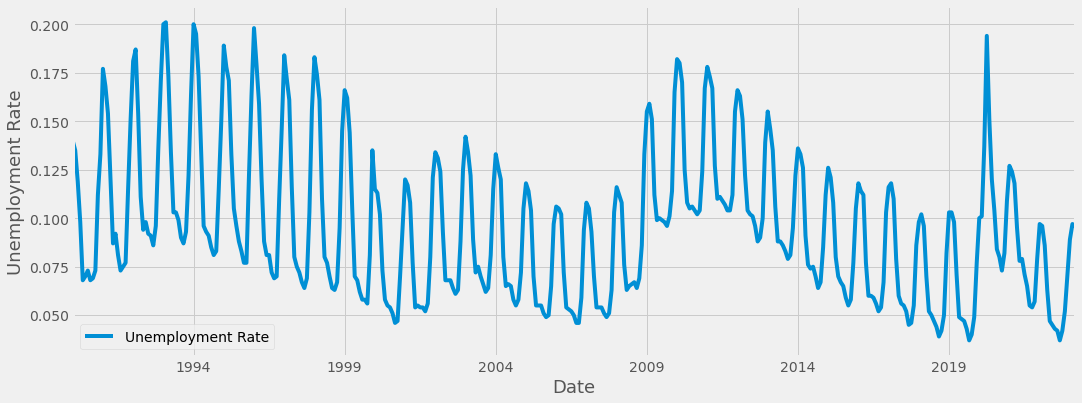

In [153]:
plot_county(Monterey)

In [154]:
U_R(Monterey)

Highest unemployment rate: 0.201
Date of highest unemployment: 1993-02


<img src='pics/monterey_county.png'>
<br> 

Monterey County experienced their highest rate of unemployement in 1993 at 20.1%

In [155]:
ed('Monterey', 73.0, 26.5, 20.1, 0, 2)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
28    Sierra              94.4                   22.3   
29    Tehama              85.8                   17.0   
30     Marin              93.4                   60.1   
31   Trinity              93.9                   18.6   
32  Monterey              73.0                   26.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
28                       20.8                               0   
29                       17.9                               0   
30                        8.7                               1   
31                       25.4                               0   
32                       20.1                               0   

    2017 Census of Agriculture Rank(Crops)  
28                                      56  
29                                      29  
30                                      47  
31                                      55  
32                                       2

### __[Orange County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06059.pdf)__

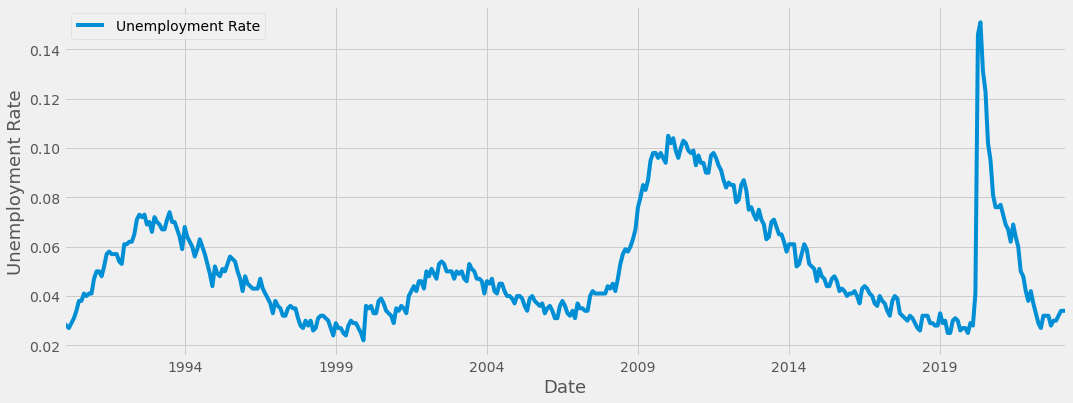

In [156]:
plot_county(Orange)

In [157]:
U_R(Orange)

Highest unemployment rate: 0.151
Date of highest unemployment: 2020-05


In [158]:
Orange = Orange.iloc[0:-38]
U_R(Orange)

Highest unemployment rate: 0.105
Date of highest unemployment: 2010-01


<img src='pics/orange_county.png'>
<br> 

Orange County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 10.5%

In [159]:
ed('Orange', 86.6, 42.1, 10.5, 1, 34)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
29    Tehama              85.8                   17.0   
30     Marin              93.4                   60.1   
31   Trinity              93.9                   18.6   
32  Monterey              73.0                   26.5   
33    Orange              86.6                   42.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
29                       17.9                               0   
30                        8.7                               1   
31                       25.4                               0   
32                       20.1                               0   
33                       10.5                               1   

    2017 Census of Agriculture Rank(Crops)  
29                                      29  
30                                      47  
31                                      55  
32                                       2  
33                                      34

### __[San Francisco County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06075.pdf)__

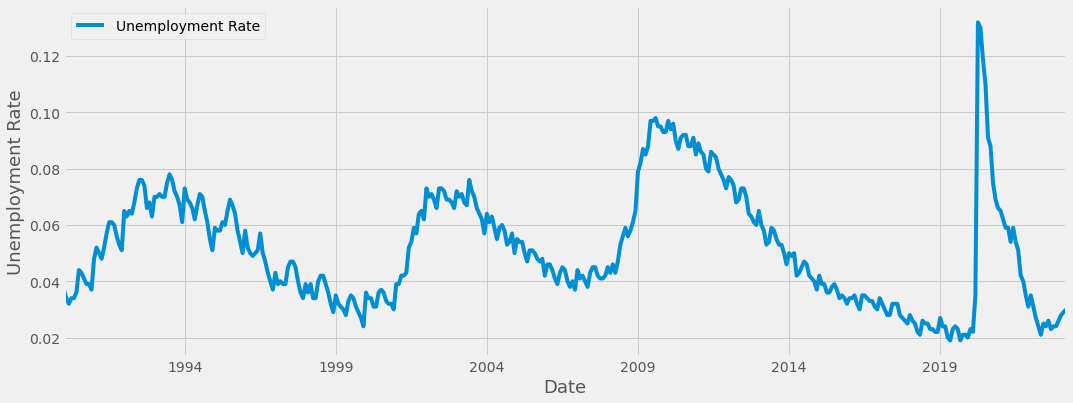

In [160]:
plot_county(San_Francisco)

In [161]:
U_R(San_Francisco)

Highest unemployment rate: 0.132
Date of highest unemployment: 2020-04


In [162]:
San_Francisco = San_Francisco.iloc[0:-38]
U_R(San_Francisco)

Highest unemployment rate: 0.098
Date of highest unemployment: 2009-08


<img src='pics/san_francisco_county.png'>
<br> 

San Francisco County experienced their highest rate of unemployement in the pandemic and their second highest in 2009 at 9.8%

In [163]:
ed('San Francisco', 88.8, 59.5, 9.8, 1, 57)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
30          Marin              93.4                   60.1   
31        Trinity              93.9                   18.6   
32       Monterey              73.0                   26.5   
33         Orange              86.6                   42.1   
34  San Francisco              88.8                   59.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
30                        8.7                               1   
31                       25.4                               0   
32                       20.1                               0   
33                       10.5                               1   
34                        9.8                               1   

    2017 Census of Agriculture Rank(Crops)  
30                                      47  
31                                      55  
32                                       2  
33                                      34  
34                                      57

### __[Mendocino County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06045.pdf)__

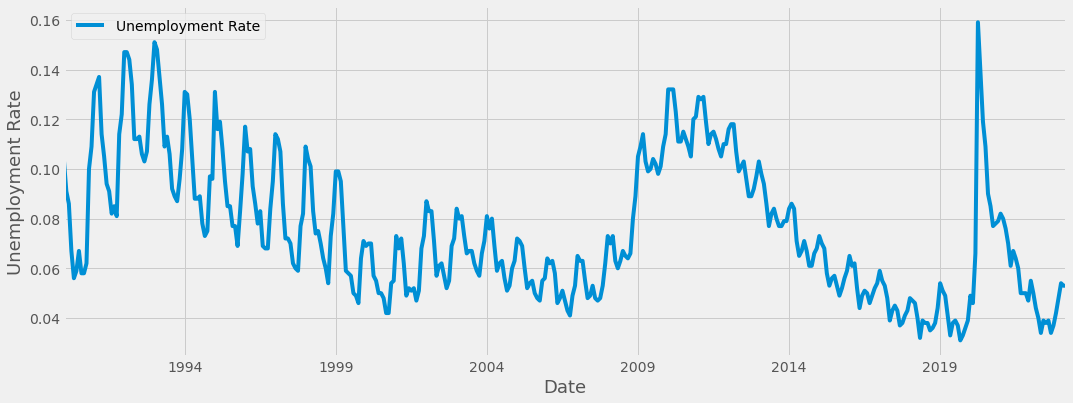

In [164]:
plot_county(Mendocino)

In [165]:
U_R(Mendocino)

Highest unemployment rate: 0.159
Date of highest unemployment: 2020-04


In [166]:
Mendocino = Mendocino.iloc[0:-38]
U_R(Mendocino)

Highest unemployment rate: 0.151
Date of highest unemployment: 1993-01


<img src='pics/mendocino_county.png'>
<br> 

Mendocino County experienced their highest rate of unemployement in the pandemic and their second highest in 1993 at 15.1%

In [167]:
ed('Mendocino', 86.6, 24.5, 15.1, 1, 30)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
31        Trinity              93.9                   18.6   
32       Monterey              73.0                   26.5   
33         Orange              86.6                   42.1   
34  San Francisco              88.8                   59.5   
35      Mendocino              86.6                   24.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
31                       25.4                               0   
32                       20.1                               0   
33                       10.5                               1   
34                        9.8                               1   
35                       15.1                               1   

    2017 Census of Agriculture Rank(Crops)  
31                                      55  
32                                       2  
33                                      34  
34                                      57  
35                                      30

### __[Santa Cruz County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06087.pdf)__

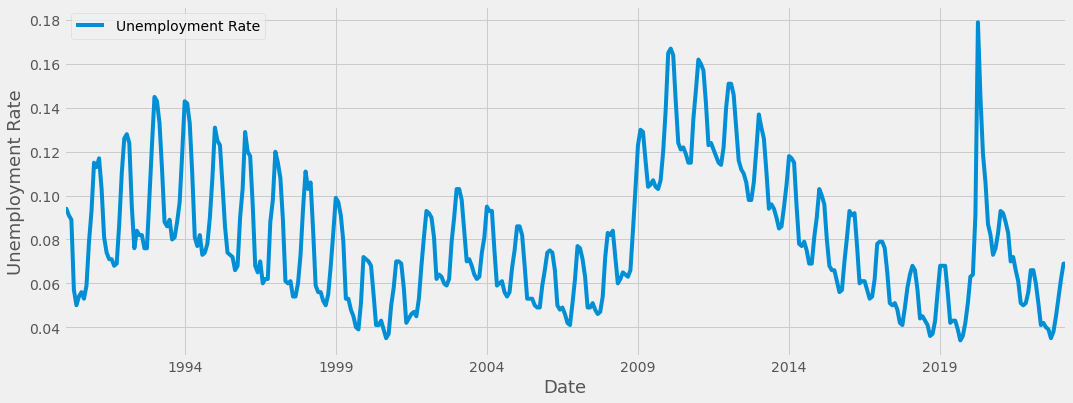

In [168]:
plot_county(Santa_Cruz)

In [169]:
U_R(Santa_Cruz)

Highest unemployment rate: 0.179
Date of highest unemployment: 2020-04


In [170]:
Santa_Cruz = Santa_Cruz.iloc[0:-38]
U_R(Santa_Cruz)

Highest unemployment rate: 0.16699999999999998
Date of highest unemployment: 2010-02


<img src='pics/santa_cruz_county.png'>
<br> 

Santa Cruz County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 16.7%

In [171]:
ed('Santa Cruz', 88.3, 41.9, 16.7, 1, 17)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
32       Monterey              73.0                   26.5   
33         Orange              86.6                   42.1   
34  San Francisco              88.8                   59.5   
35      Mendocino              86.6                   24.5   
36     Santa Cruz              88.3                   41.9   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
32                       20.1                               0   
33                       10.5                               1   
34                        9.8                               1   
35                       15.1                               1   
36                       16.7                               1   

    2017 Census of Agriculture Rank(Crops)  
32                                       2  
33                                      34  
34                                      57  
35                                      30  
36                                      17

### __[Kings County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06031.pdf)__

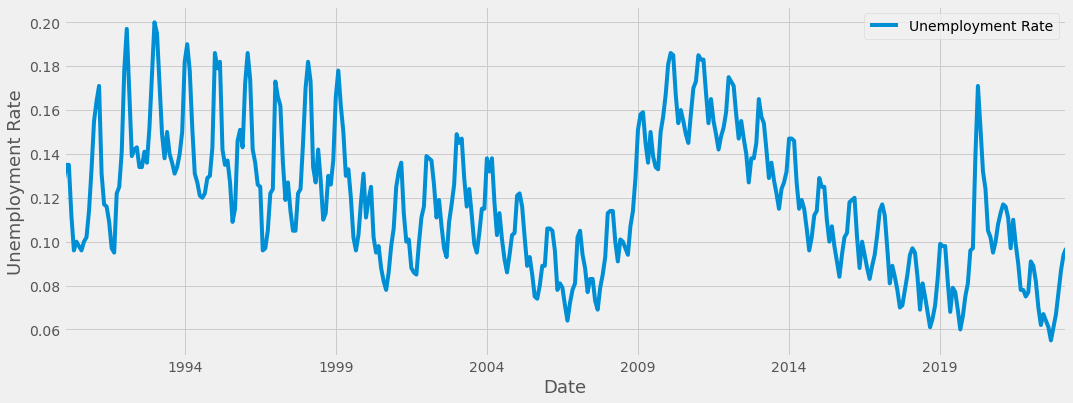

In [172]:
plot_county(Kings)

In [173]:
U_R(Kings)

Highest unemployment rate: 0.2
Date of highest unemployment: 1993-01


<img src='pics/kings_county.png'>
<br> 

Kings County experienced their highest rate of unemployement in 1993 at 20.0%

In [174]:
ed('Kings', 73.6, 14.3, 20.0, 0, 12)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
33         Orange              86.6                   42.1   
34  San Francisco              88.8                   59.5   
35      Mendocino              86.6                   24.5   
36     Santa Cruz              88.3                   41.9   
37          Kings              73.6                   14.3   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
33                       10.5                               1   
34                        9.8                               1   
35                       15.1                               1   
36                       16.7                               1   
37                       20.0                               0   

    2017 Census of Agriculture Rank(Crops)  
33                                      34  
34                                      57  
35                                      30  
36                                      17  
37                                      12

### __[Fresno County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06019.pdf)__

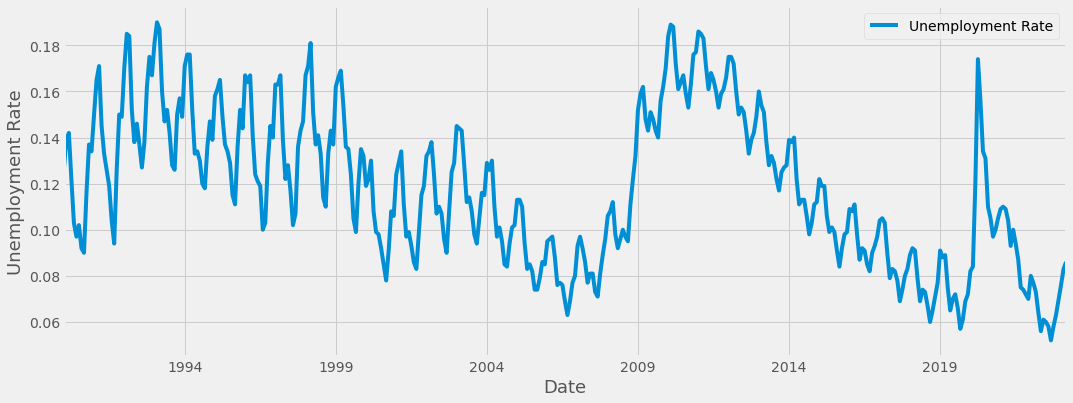

In [175]:
plot_county(Fresno)

In [176]:
U_R(Fresno)

Highest unemployment rate: 0.19
Date of highest unemployment: 1993-02


<img src='pics/fresno_county.png'>
<br> 

Fresno County experienced their highest rate of unemployement in 1993 at 19.0%

In [177]:
ed('Fresno', 77.9, 22.6, 19.0, 0, 1)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
34  San Francisco              88.8                   59.5   
35      Mendocino              86.6                   24.5   
36     Santa Cruz              88.3                   41.9   
37          Kings              73.6                   14.3   
38         Fresno              77.9                   22.6   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
34                        9.8                               1   
35                       15.1                               1   
36                       16.7                               1   
37                       20.0                               0   
38                       19.0                               0   

    2017 Census of Agriculture Rank(Crops)  
34                                      57  
35                                      30  
36                                      17  
37                                      12  
38                                       1

### __[Santa Barbara County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06083.pdf)__

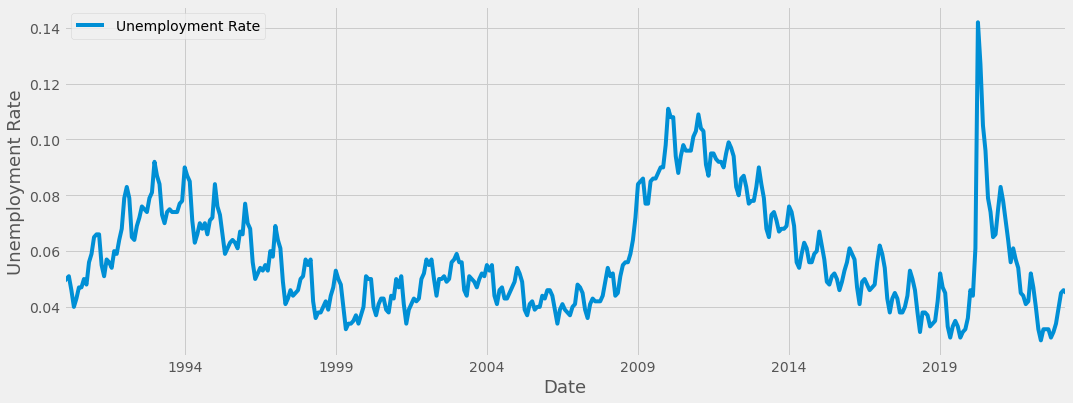

In [178]:
plot_county(Santa_Barbara)

In [179]:
U_R(Santa_Barbara)

Highest unemployment rate: 0.142
Date of highest unemployment: 2020-04


In [180]:
Santa_Barbara = Santa_Barbara.iloc[0:-38]
U_R(Santa_Barbara)

Highest unemployment rate: 0.111
Date of highest unemployment: 2010-01


<img src='pics/santa_barbara_county.png'>
<br> 

Santa Barbara County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 11.1%

In [181]:
ed('Santa Barbara', 81.9, 35.1, 11.1, 1, 7)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
35      Mendocino              86.6                   24.5   
36     Santa Cruz              88.3                   41.9   
37          Kings              73.6                   14.3   
38         Fresno              77.9                   22.6   
39  Santa Barbara              81.9                   35.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
35                       15.1                               1   
36                       16.7                               1   
37                       20.0                               0   
38                       19.0                               0   
39                       11.1                               1   

    2017 Census of Agriculture Rank(Crops)  
35                                      30  
36                                      17  
37                                      12  
38                                       1  
39                                       7

### __[Shasta County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06089.pdf)__

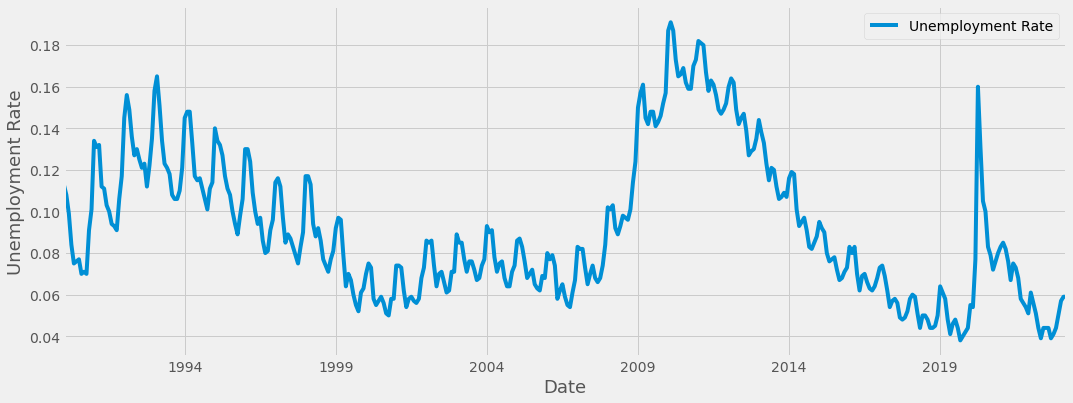

In [182]:
plot_county(Shasta)

In [183]:
U_R(Shasta)

Highest unemployment rate: 0.191
Date of highest unemployment: 2010-02


<img src='pics/shasta_county.png'>
<br> 

Shasta County experienced their highest rate of unemployement in 2010 at 19.1

In [184]:
ed('Shasta', 91.1, 22.6, 19.1, 0, 43)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
36     Santa Cruz              88.3                   41.9   
37          Kings              73.6                   14.3   
38         Fresno              77.9                   22.6   
39  Santa Barbara              81.9                   35.1   
40         Shasta              91.1                   22.6   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
36                       16.7                               1   
37                       20.0                               0   
38                       19.0                               0   
39                       11.1                               1   
40                       19.1                               0   

    2017 Census of Agriculture Rank(Crops)  
36                                      17  
37                                      12  
38                                       1  
39                                       7  
40                                      43

### __[Sonoma County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06097.pdf)__

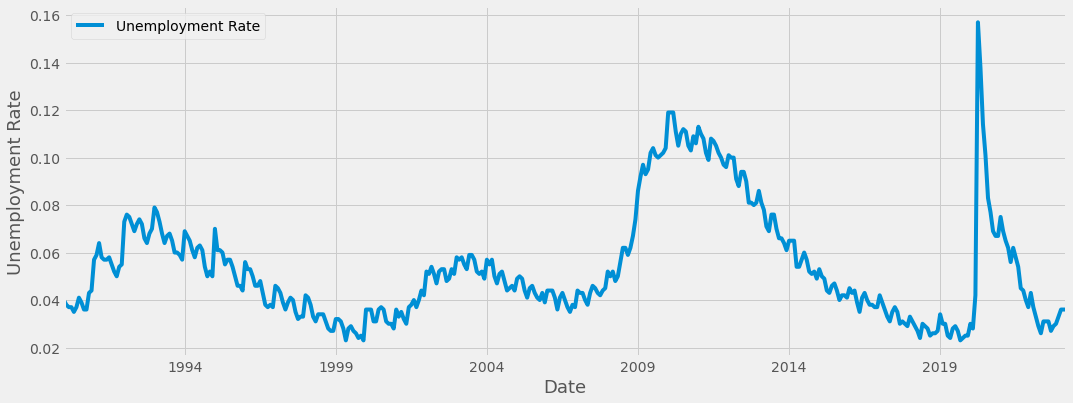

In [185]:
plot_county(Sonoma)

In [186]:
U_R(Sonoma)

Highest unemployment rate: 0.157
Date of highest unemployment: 2020-04


In [187]:
Sonoma = Sonoma.iloc[0:-38]
U_R(Sonoma)

Highest unemployment rate: 0.11900000000000001
Date of highest unemployment: 2010-02


<img src='pics/sonoma_county.png'>
<br> 

Sonoma County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 11.9%

In [188]:
ed('Sonoma', 89.2, 37.1, 11.9, 1, 16)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
37          Kings              73.6                   14.3   
38         Fresno              77.9                   22.6   
39  Santa Barbara              81.9                   35.1   
40         Shasta              91.1                   22.6   
41         Sonoma              89.2                   37.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
37                       20.0                               0   
38                       19.0                               0   
39                       11.1                               1   
40                       19.1                               0   
41                       11.9                               1   

    2017 Census of Agriculture Rank(Crops)  
37                                      12  
38                                       1  
39                                       7  
40                                      43  
41                                      16

### __[Kern County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06029.pdf)__

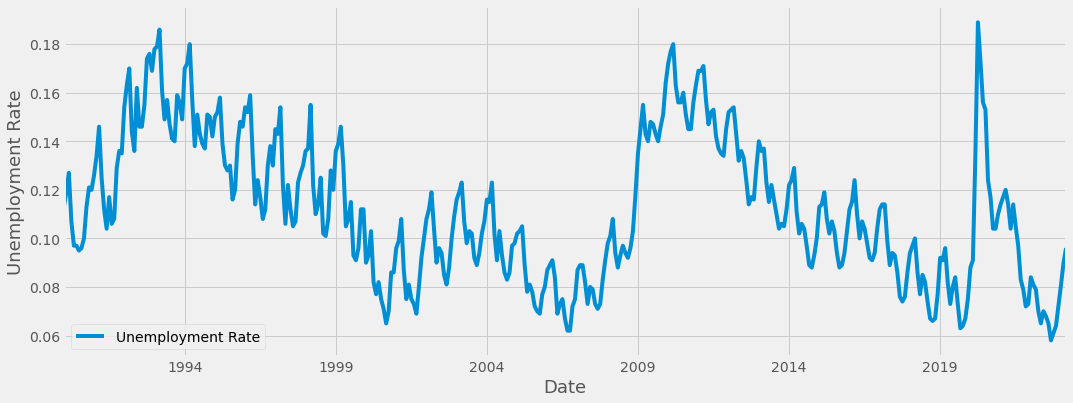

In [189]:
plot_county(Kern)

In [190]:
U_R(Kern)

Highest unemployment rate: 0.18899999999999997
Date of highest unemployment: 2020-04


In [191]:
Kern = Kern.iloc[0:-38]
U_R(Kern)

Highest unemployment rate: 0.18600000000000003
Date of highest unemployment: 1993-03


<img src='pics/kern_county.png'>
<br> 

Kern County experienced their highest rate of unemployement in the pandemic and their second highest in 1993 at 18.6%

In [192]:
ed('Kern', 75.9, 17.6, 18.6, 1, 3)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
38         Fresno              77.9                   22.6   
39  Santa Barbara              81.9                   35.1   
40         Shasta              91.1                   22.6   
41         Sonoma              89.2                   37.1   
42           Kern              75.9                   17.6   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
38                       19.0                               0   
39                       11.1                               1   
40                       19.1                               0   
41                       11.9                               1   
42                       18.6                               1   

    2017 Census of Agriculture Rank(Crops)  
38                                       1  
39                                       7  
40                                      43  
41                                      16  
42                                       3

### __[Modoc County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06049.pdf)__

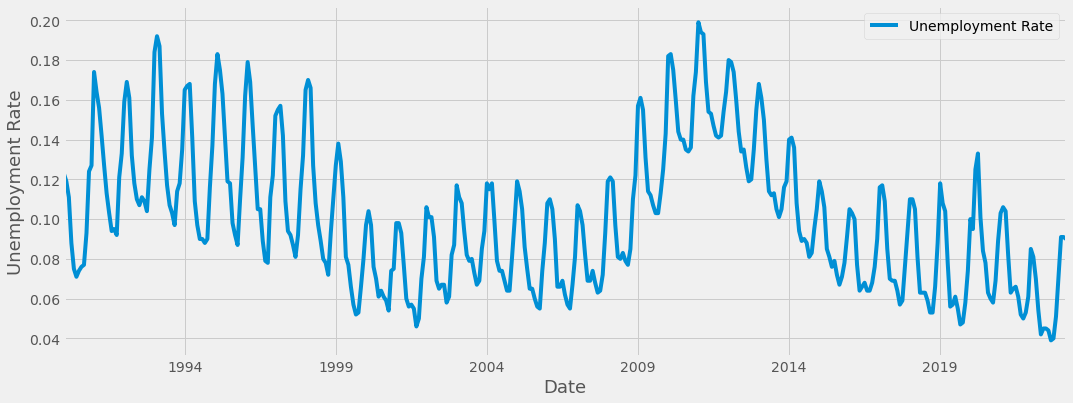

In [193]:
plot_county(Modoc)

In [194]:
U_R(Modoc)

Highest unemployment rate: 0.19899999999999998
Date of highest unemployment: 2011-01


<img src='pics/modoc_county.png'>
<br> 

Modoc County experienced their highest rate of unemployement in the pandemic and their second highest in 2011 at 19.9%

In [195]:
ed('Modoc', 85.5, 19.7, 19.9, 0, 35)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
39  Santa Barbara              81.9                   35.1   
40         Shasta              91.1                   22.6   
41         Sonoma              89.2                   37.1   
42           Kern              75.9                   17.6   
43          Modoc              85.5                   19.7   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
39                       11.1                               1   
40                       19.1                               0   
41                       11.9                               1   
42                       18.6                               1   
43                       19.9                               0   

    2017 Census of Agriculture Rank(Crops)  
39                                       7  
40                                      43  
41                                      16  
42                                       3  
43                                      35

### __[Sacramento County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06067.pdf)__

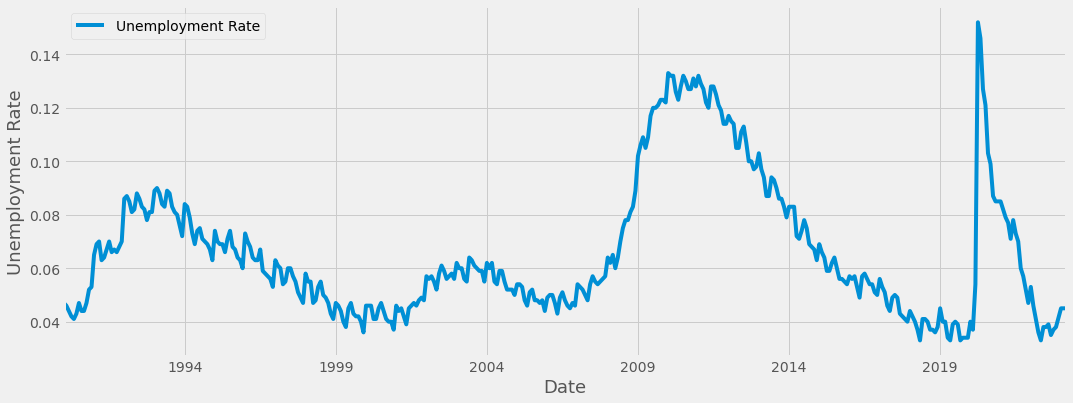

In [196]:
plot_county(Sacramento)

In [197]:
U_R(Sacramento)

Highest unemployment rate: 0.152
Date of highest unemployment: 2020-04


In [198]:
Sacramento = Sacramento.iloc[0:-38]
U_R(Sacramento)

Highest unemployment rate: 0.133
Date of highest unemployment: 2010-01


<img src='pics/sacramento_county.png'>
<br> 

Sacramento County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 13.3%

In [199]:
ed('Sacramento', 88.1, 32.0, 13.3, 1, 24)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
40      Shasta              91.1                   22.6   
41      Sonoma              89.2                   37.1   
42        Kern              75.9                   17.6   
43       Modoc              85.5                   19.7   
44  Sacramento              88.1                   32.0   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
40                       19.1                               0   
41                       11.9                               1   
42                       18.6                               1   
43                       19.9                               0   
44                       13.3                               1   

    2017 Census of Agriculture Rank(Crops)  
40                                      43  
41                                      16  
42                                       3  
43                                      35  
44                                      24

### __[Santa Clara County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06085.pdf)__

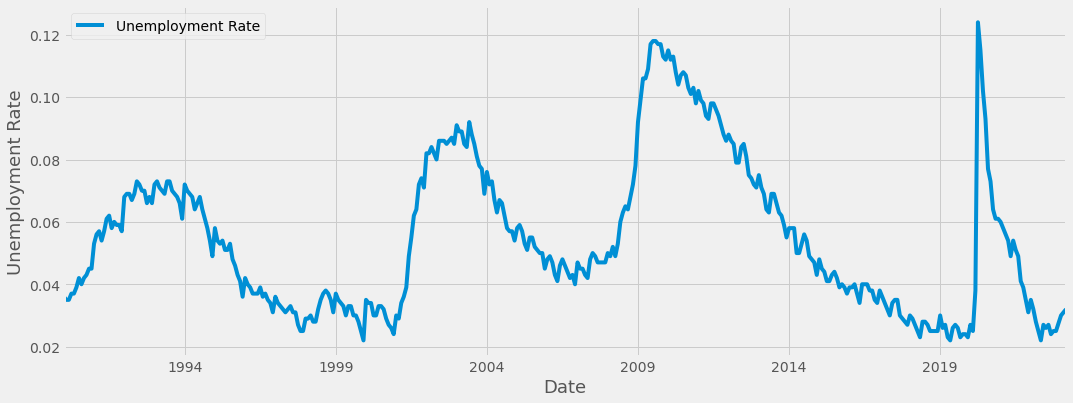

In [200]:
plot_county(Santa_Clara)

In [201]:
U_R(Santa_Clara)

Highest unemployment rate: 0.124
Date of highest unemployment: 2020-04


In [202]:
Santa_Clara = Santa_Clara.iloc[0:-38]
U_R(Santa_Clara)

Highest unemployment rate: 0.11800000000000001
Date of highest unemployment: 2009-08


<img src='pics/santa_clara_county.png'>
<br> 

Santa Clara County experienced their highest rate of unemployement in the pandemic and their second highest in 2009 at 11.8%

In [203]:
ed('Santa Clara', 89.2, 54.4, 11.8, 1, 25)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
41       Sonoma              89.2                   37.1   
42         Kern              75.9                   17.6   
43        Modoc              85.5                   19.7   
44   Sacramento              88.1                   32.0   
45  Santa Clara              89.2                   54.4   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
41                       11.9                               1   
42                       18.6                               1   
43                       19.9                               0   
44                       13.3                               1   
45                       11.8                               1   

    2017 Census of Agriculture Rank(Crops)  
41                                      16  
42                                       3  
43                                      35  
44                                      24  
45                                      25

### __[San Joaquin County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06077.pdf)__

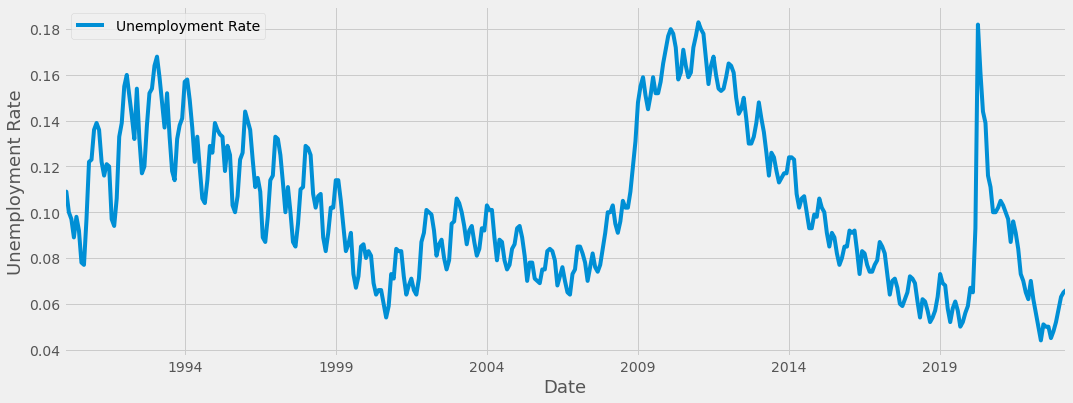

In [204]:
plot_county(San_Joaquin)

In [205]:
U_R(San_Joaquin)

Highest unemployment rate: 0.183
Date of highest unemployment: 2011-01


<img src='pics/san_joaquin_county.png'>
<br> 

San Joaquin County experienced their highest rate of unemployement in 2011 at 18.3%

In [206]:
ed('San Joaquin', 80.3, 19.5, 18.3, 0, 5)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
42         Kern              75.9                   17.6   
43        Modoc              85.5                   19.7   
44   Sacramento              88.1                   32.0   
45  Santa Clara              89.2                   54.4   
46  San Joaquin              80.3                   19.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
42                       18.6                               1   
43                       19.9                               0   
44                       13.3                               1   
45                       11.8                               1   
46                       18.3                               0   

    2017 Census of Agriculture Rank(Crops)  
42                                       3  
43                                      35  
44                                      24  
45                                      25  
46                                       5

### __[Nevada County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06057.pdf)__

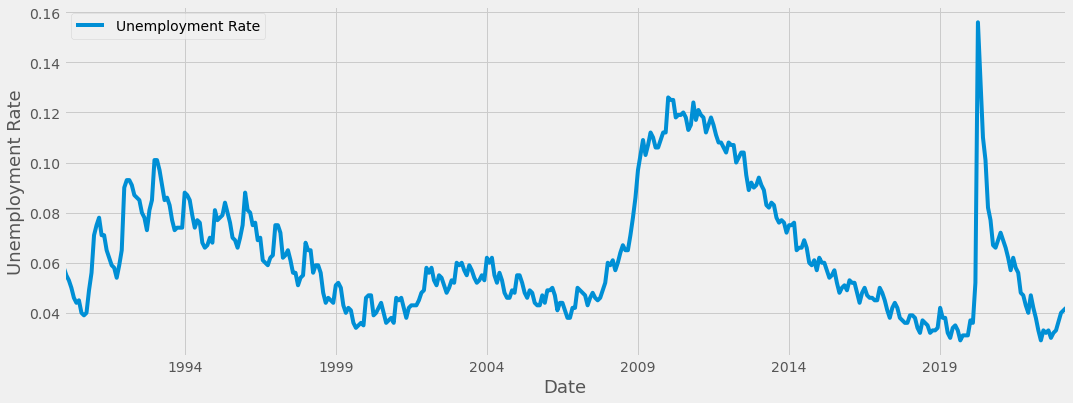

In [207]:
plot_county(Nevada)

In [208]:
U_R(Nevada)

Highest unemployment rate: 0.156
Date of highest unemployment: 2020-04


In [209]:
Nevada = Nevada.iloc[0:-38]
U_R(Nevada)

Highest unemployment rate: 0.126
Date of highest unemployment: 2010-01


<img src='pics/nevada_county.png'>
<br> 

Nevada County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 12.6%

In [210]:
ed('Nevada', 95.1, 38.7, 12.6, 1, 49)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
43        Modoc              85.5                   19.7   
44   Sacramento              88.1                   32.0   
45  Santa Clara              89.2                   54.4   
46  San Joaquin              80.3                   19.5   
47       Nevada              95.1                   38.7   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
43                       19.9                               0   
44                       13.3                               1   
45                       11.8                               1   
46                       18.3                               0   
47                       12.6                               1   

    2017 Census of Agriculture Rank(Crops)  
43                                      35  
44                                      24  
45                                      25  
46                                       5  
47                                      49

### __[Mariposa County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06043.pdf)__

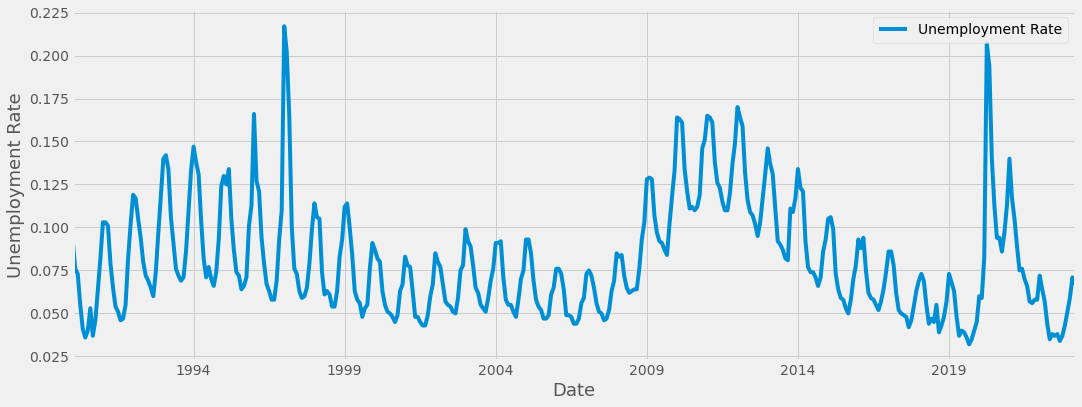

In [211]:
plot_county(Mariposa)

In [212]:
U_R(Mariposa)

Highest unemployment rate: 0.217
Date of highest unemployment: 1997-01


<img src='pics/mariposa_county.png'>
<br> 

Mariposa County experienced their highest rate of unemployement 1997 at 21.7%

In [213]:
ed('Mariposa', 90.9, 28.9, 21.7, 0, 52)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
44   Sacramento              88.1                   32.0   
45  Santa Clara              89.2                   54.4   
46  San Joaquin              80.3                   19.5   
47       Nevada              95.1                   38.7   
48     Mariposa              90.9                   28.9   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
44                       13.3                               1   
45                       11.8                               1   
46                       18.3                               0   
47                       12.6                               1   
48                       21.7                               0   

    2017 Census of Agriculture Rank(Crops)  
44                                      24  
45                                      25  
46                                       5  
47                                      49  
48                                      52

### __[Tulare County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06107.pdf)__

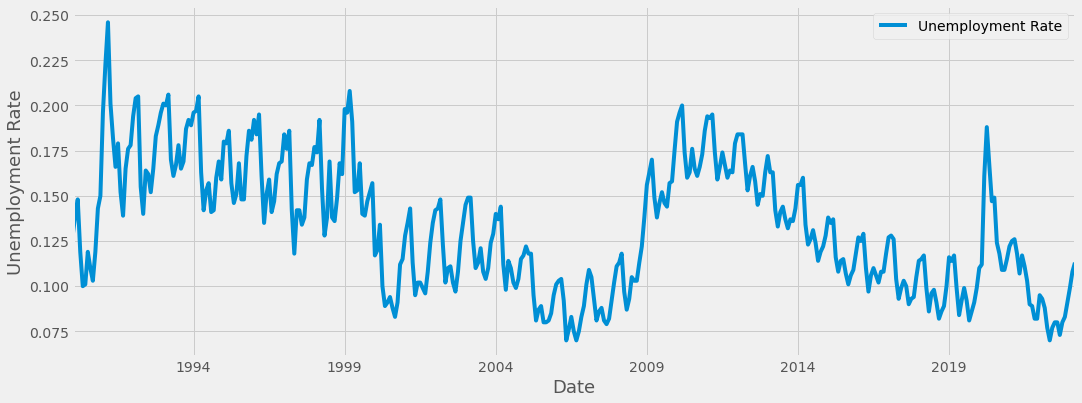

In [214]:
plot_county(Tulare)

In [215]:
U_R(Tulare)

Highest unemployment rate: 0.24600000000000002
Date of highest unemployment: 1991-03


<img src='pics/tulare_county.png'>
<br> 

Tulare County experienced their highest rate of unemployement in 1991 at 24.6%

In [216]:
ed('Tulare', 72.6, 15.2, 24.6, 0, 4)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
45  Santa Clara              89.2                   54.4   
46  San Joaquin              80.3                   19.5   
47       Nevada              95.1                   38.7   
48     Mariposa              90.9                   28.9   
49       Tulare              72.6                   15.2   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
45                       11.8                               1   
46                       18.3                               0   
47                       12.6                               1   
48                       21.7                               0   
49                       24.6                               0   

    2017 Census of Agriculture Rank(Crops)  
45                                      25  
46                                       5  
47                                      49  
48                                      52  
49                                       4

### __[Contra Costa County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06013.pdf)__

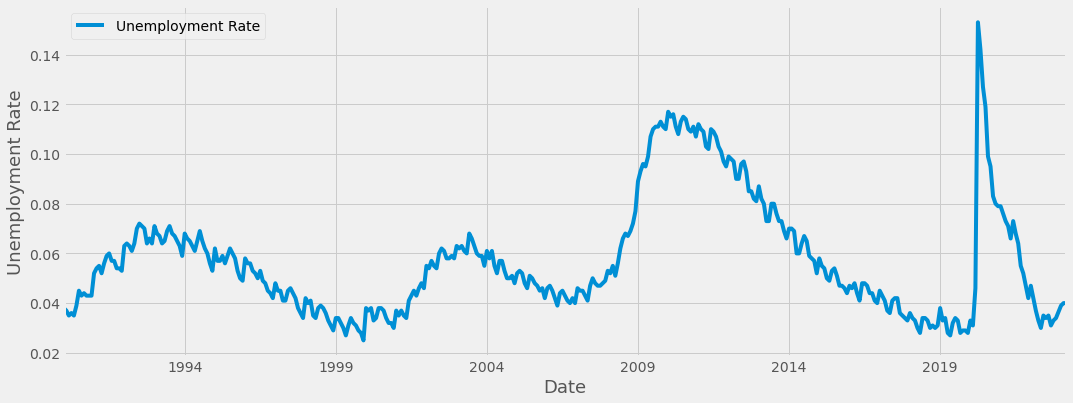

In [217]:
plot_county(Contra_Costa)

In [218]:
U_R(Contra_Costa)

Highest unemployment rate: 0.153
Date of highest unemployment: 2020-04


In [219]:
Contra_Costa = Contra_Costa.iloc[0:-38]
U_R(Contra_Costa)

Highest unemployment rate: 0.11699999999999999
Date of highest unemployment: 2010-01


<img src='pics/contra_costa_county.png'>
<br> 

Contra Costa County experienced their highest rate of unemployement in the pandemic and their second highest in 2010 at 11.7%

In [220]:
ed('Contra Costa', 89.7, 44.1, 11.7, 1, 39)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
46   San Joaquin              80.3                   19.5   
47        Nevada              95.1                   38.7   
48      Mariposa              90.9                   28.9   
49        Tulare              72.6                   15.2   
50  Contra Costa              89.7                   44.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
46                       18.3                               0   
47                       12.6                               1   
48                       21.7                               0   
49                       24.6                               0   
50                       11.7                               1   

    2017 Census of Agriculture Rank(Crops)  
46                                       5  
47                                      49  
48                                      52  
49                                       4  
50                                      39

### __[Merced County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06047.pdf)__

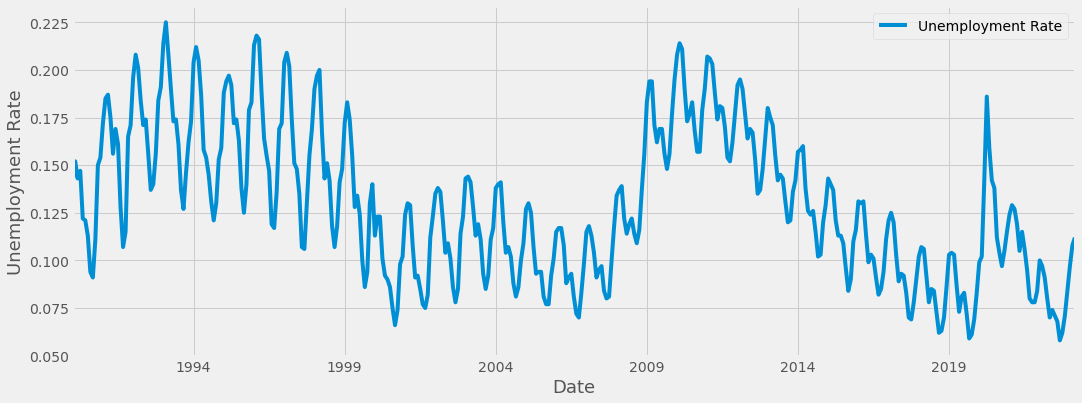

In [221]:
plot_county(Merced)

In [222]:
U_R(Merced)

Highest unemployment rate: 0.225
Date of highest unemployment: 1993-02


<img src='pics/merced_county.png'>
<br> 

Merced County experienced their highest rate of unemployement in the 1993 at 22.5%

In [223]:
ed('Merced', 70.4, 14.1, 22.5, 0, 9)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
47        Nevada              95.1                   38.7   
48      Mariposa              90.9                   28.9   
49        Tulare              72.6                   15.2   
50  Contra Costa              89.7                   44.1   
51        Merced              70.4                   14.1   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
47                       12.6                               1   
48                       21.7                               0   
49                       24.6                               0   
50                       11.7                               1   
51                       22.5                               0   

    2017 Census of Agriculture Rank(Crops)  
47                                      49  
48                                      52  
49                                       4  
50                                      39  
51                                       9

### __[San Benito County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06069.pdf)__

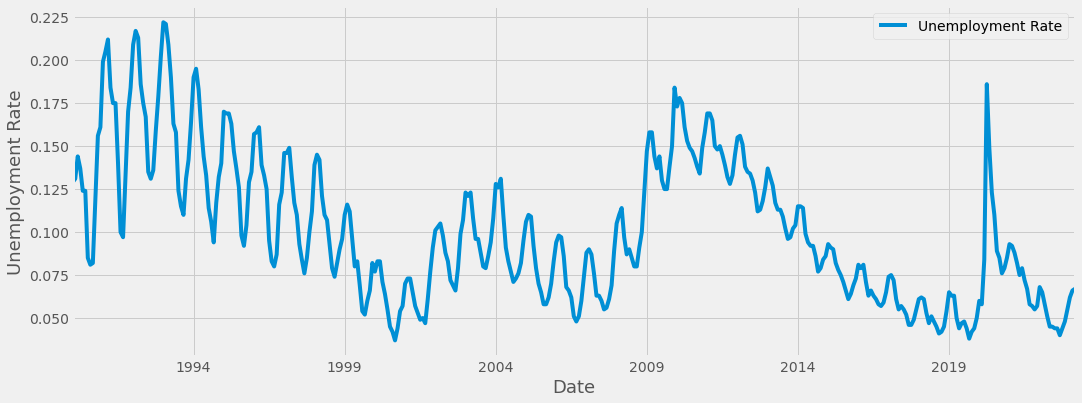

In [224]:
plot_county(San_Benito)

In [225]:
U_R(San_Benito)

Highest unemployment rate: 0.222
Date of highest unemployment: 1993-01


<img src='pics/san_benito_county.png'>
<br> 

San Benito County experienced their highest rate of unemployement in 1993 at 22.2%

In [226]:
ed('San Benito', 83.3, 20.5, 22.2, 0, 32)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
48      Mariposa              90.9                   28.9   
49        Tulare              72.6                   15.2   
50  Contra Costa              89.7                   44.1   
51        Merced              70.4                   14.1   
52    San Benito              83.3                   20.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
48                       21.7                               0   
49                       24.6                               0   
50                       11.7                               1   
51                       22.5                               0   
52                       22.2                               0   

    2017 Census of Agriculture Rank(Crops)  
48                                      52  
49                                       4  
50                                      39  
51                                       9  
52                                      32

### __[Lassen County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06035.pdf)__

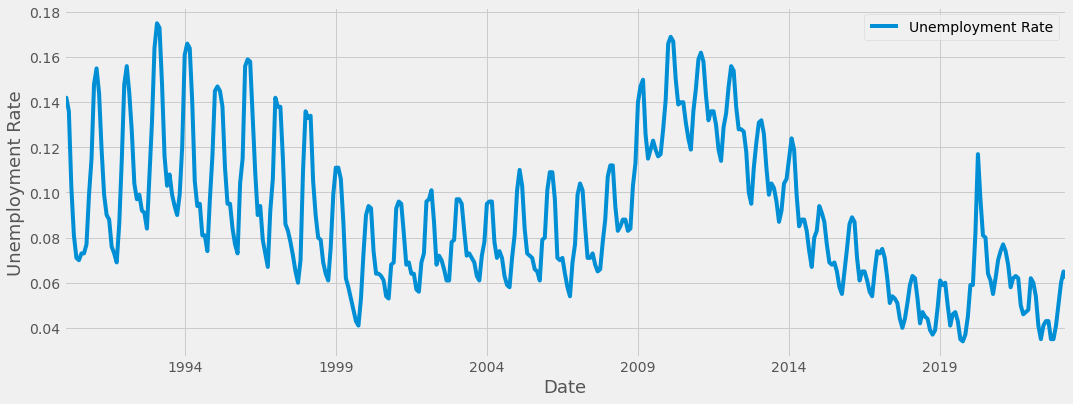

In [227]:
plot_county(Lassen)

In [228]:
U_R(Lassen)

Highest unemployment rate: 0.175
Date of highest unemployment: 1993-02


<img src='pics/lassen_county.png'>
<br> 

Lassen County experienced their highest rate of unemployement in 1993 at 17.5%

In [229]:
ed('Lassen', 80.0, 11.8, 17.5, 0, 45)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
49        Tulare              72.6                   15.2   
50  Contra Costa              89.7                   44.1   
51        Merced              70.4                   14.1   
52    San Benito              83.3                   20.5   
53        Lassen              80.0                   11.8   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
49                       24.6                               0   
50                       11.7                               1   
51                       22.5                               0   
52                       22.2                               0   
53                       17.5                               0   

    2017 Census of Agriculture Rank(Crops)  
49                                       4  
50                                      39  
51                                       9  
52                                      32  
53                                      45

### __[San Mateo County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06081.pdf)__

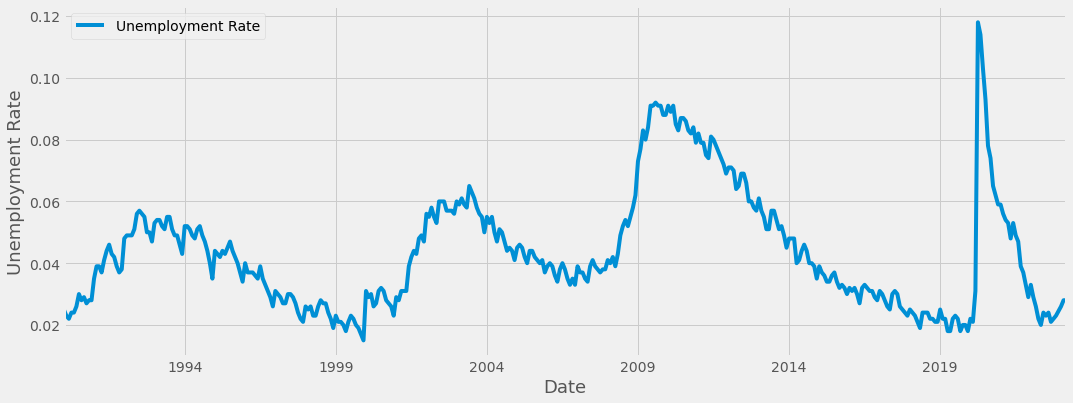

In [230]:
plot_county(San_Mateo)

In [231]:
U_R(San_Mateo)

Highest unemployment rate: 0.11800000000000001
Date of highest unemployment: 2020-04


In [232]:
San_Mateo = San_Mateo.iloc[0:-38]
U_R(San_Mateo)

Highest unemployment rate: 0.092
Date of highest unemployment: 2009-08


<img src='pics/san_mateo_county.png'>
<br> 

San Mateo County experienced their highest rate of unemployement in the pandemic and their second highest in 2009 at 9.2%

In [233]:
ed('San Mateo', 90.8, 52.5, 9.2, 1, 37)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
50  Contra Costa              89.7                   44.1   
51        Merced              70.4                   14.1   
52    San Benito              83.3                   20.5   
53        Lassen              80.0                   11.8   
54     San Mateo              90.8                   52.5   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
50                       11.7                               1   
51                       22.5                               0   
52                       22.2                               0   
53                       17.5                               0   
54                        9.2                               1   

    2017 Census of Agriculture Rank(Crops)  
50                                      39  
51                                       9  
52                                      32  
53                                      45  
54                                      37

### __[Stanislaus County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06099.pdf)__

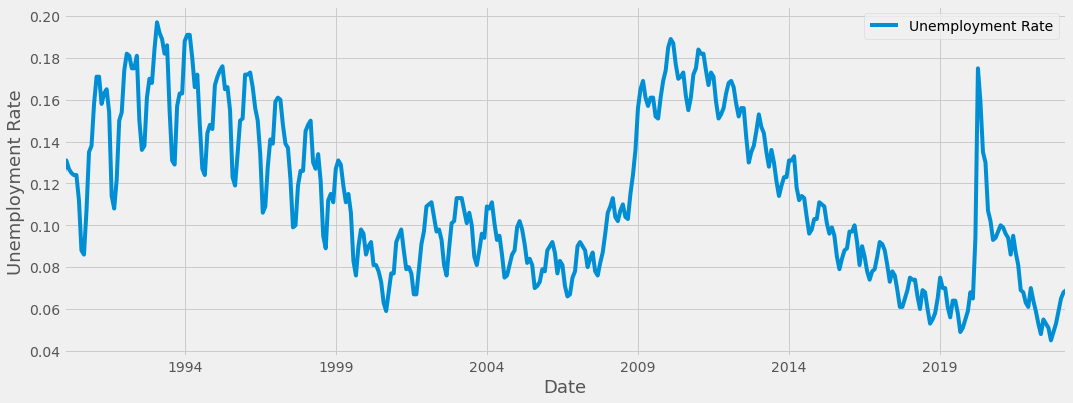

In [234]:
plot_county(Stanislaus)

In [235]:
U_R(Stanislaus)

Highest unemployment rate: 0.19699999999999998
Date of highest unemployment: 1993-02


<img src='pics/stanislaus_county.png'>
<br> 

Stanislaus County experienced their highest rate of unemployement in 1993 at 19.7%

In [236]:
ed('Stanislaus', 80.0, 17.9, 19.7, 0, 8)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
51      Merced              70.4                   14.1   
52  San Benito              83.3                   20.5   
53      Lassen              80.0                   11.8   
54   San Mateo              90.8                   52.5   
55  Stanislaus              80.0                   17.9   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
51                       22.5                               0   
52                       22.2                               0   
53                       17.5                               0   
54                        9.2                               1   
55                       19.7                               0   

    2017 Census of Agriculture Rank(Crops)  
51                                       9  
52                                      32  
53                                      45  
54                                      37  
55                                       8

### __[Inyo County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06027.pdf)__

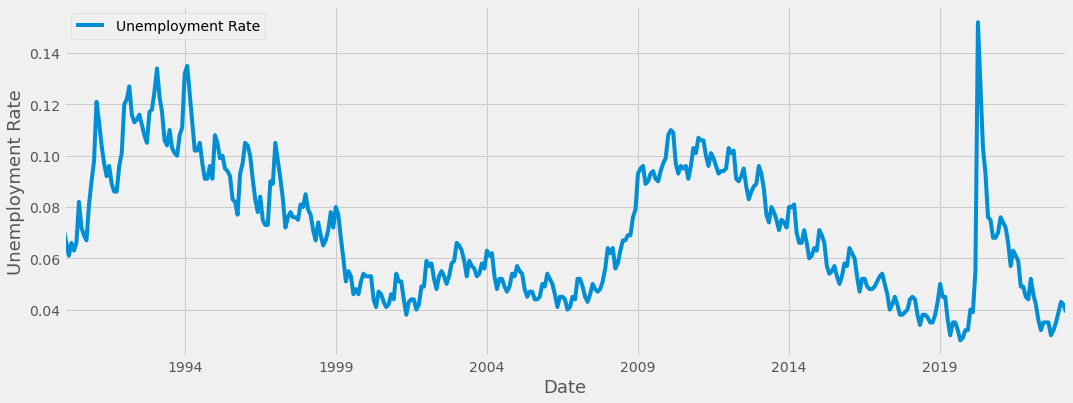

In [237]:
plot_county(Inyo)

In [238]:
U_R(Inyo)

Highest unemployment rate: 0.152
Date of highest unemployment: 2020-04


In [239]:
Inyo = Inyo.iloc[0:-38]
U_R(Inyo)

Highest unemployment rate: 0.135
Date of highest unemployment: 1994-02


<img src='pics/inyo_county.png'>
<br> 

Inyo County experienced their highest rate of unemployement in the pandemic and their second highest in 1994 at 13.5%

In [240]:
ed('Inyo', 92.5, 27.3, 13.5, 1, 53)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
52  San Benito              83.3                   20.5   
53      Lassen              80.0                   11.8   
54   San Mateo              90.8                   52.5   
55  Stanislaus              80.0                   17.9   
56        Inyo              92.5                   27.3   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
52                       22.2                               0   
53                       17.5                               0   
54                        9.2                               1   
55                       19.7                               0   
56                       13.5                               1   

    2017 Census of Agriculture Rank(Crops)  
52                                      32  
53                                      45  
54                                      37  
55                                       8  
56                                      53

### __[Imperial County](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/County_Profiles/California/cp06025.pdf)__

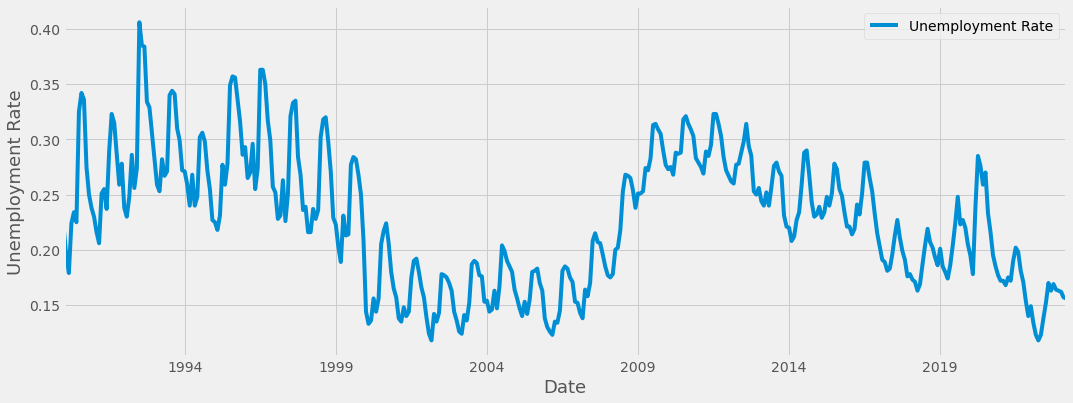

In [241]:
plot_county(Imperial)

In [242]:
U_R(Imperial)

Highest unemployment rate: 0.406
Date of highest unemployment: 1992-07


<img src='pics/imperial_county.png'>
<br> 

Imperial County experienced their highest rate of unemployement in 1992 at 40.6%

In [243]:
ed('Nevada', 70.4, 15.2, 40.6, 0, 8)
county_ed.tail()

County  High School Grad  4 Year College Degree  \
53      Lassen              80.0                   11.8   
54   San Mateo              90.8                   52.5   
55  Stanislaus              80.0                   17.9   
56        Inyo              92.5                   27.3   
57      Nevada              70.4                   15.2   

    Highest Unemployment Rate  Highest UR was during Pandemic  \
53                       17.5                               0   
54                        9.2                               1   
55                       19.7                               0   
56                       13.5                               1   
57                       40.6                               0   

    2017 Census of Agriculture Rank(Crops)  
53                                      45  
54                                      37  
55                                       8  
56                                      53  
57                                       8

In [244]:
c_e = county_ed.copy()

c_e.to_csv('county_ed.csv', index=False)

### Hypothesis Testing

Our original hypothesis: 

_According to the article  by Elen Theodossiou and Steven F. Hipple, __['Unemployment remains high in 2010'](https://www.bls.gov/opub/mlr/2011/03/art1full.pdf)__, __"Workers with less education continued to experience a
substantially higher unemployment rate than did better educated members of the labor force."__(4) <br> 

The pandemic in 2020 created massive gaps in employment opportunity internationally but historically California has ranked highly in unemployment, at the time of this project (March 2023 was the most recent data) California's unemployment rate is 45th of 51 entries. <br>

__Our goal then is to put Theodossiou and Hipple's claim to the test.__ We will see if California cities experienced a historic rate of unemployment higher than 2020's pandemic and if so, explore higher education data from the __[United States Census Bureau](https://www.census.gov/)__. <br> _ 

#### So how will we test this? 

We have created a dataset to test whether or not there is a connection between education level and higher rates of unemployment; we have a binary classifier as one of our targets and can create a small classification model to test if there is a correlation between education level and unemployment rate. 

We can also compare a regression model on level of education and rate of unemployment to see if there is any correlation between the two. 

## Baseline Model: DecisionTreeClassifier()

We will test to find which feature is most highly correlated to unemployment rate. 

In [245]:
# make variable name smaller for ease of use 
ce = county_ed.copy()


# drop 'city' from our new variable
ce = ce.drop(['County','Highest Unemployment Rate', '2017 Census of Agriculture Rank(Crops)'], axis =1)


# set target variable
target = ce['Highest UR was during Pandemic']

# drop target column 
X = ce.drop(columns = 'Highest UR was during Pandemic', axis =1)

In [246]:
# import train_test_split
from sklearn.model_selection import train_test_split 

# create variables for modeling 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    target, 
                                                    random_state = 42)

In [247]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(random_state = 42)

# fit classifier onto training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [248]:
# Baseline training score
print('Decision Tree Base Model training score: {}'.format(dtc.score(X_train, y_train)))
# Expected output: 0.9767441860465116

Decision Tree Base Model training score: 0.9767441860465116


In [249]:
# Baseline testing score 
print('Decision Tree Base Model testing score: {}'.format(dtc.score(X_test, y_test)))
# Expected output: 0.6666666666666666

Decision Tree Base Model testing score: 0.6666666666666666


Let's attempt a RandomForestClassifier to see if we can raise our testing score on our manufactured dataset. 

## RandomForestClassifier()

In [250]:
# import our classifier
from sklearn.ensemble import RandomForestClassifier 

# set forest as variable, random_state = 42, max_depth = 3
forest = RandomForestClassifier(random_state = 42)

# fit new classifier onto training data
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [251]:
print('Random Forest training score: {}'.format(forest.score(X_train, y_train)))
# Expected output: 0.9767441860465116

Random Forest training score: 0.9767441860465116


In [252]:
print('Random Forest testing score: {}'.format(forest.score(X_test, y_test)))
# Expected output: 0.8666666666666667

Random Forest testing score: 0.8666666666666667


Great! Our testing score is up nearly 20% 
Let's try some hyperparameter tuning to see if there is any effect. 

### Hyperparameter tuning on RandomForestClassifier() w/ Random Search Training

In [253]:
# pull parameter keys from our classifier
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [254]:
# Create parameter grid for our RandomSearch
param_grid = {'bootstrap': [True, False],
              'max_depth': [1,2,3,4,5], 
              'max_features': ['auto', 'sqrt'], 
              'n_estimators': [1,2,3], 
              'random_state': [42]}

In [255]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(estimator = rf, 
                           param_distributions = param_grid, 
                           n_iter = 10, 
                           cv=3
                          )
rf_cv.fit(X_train, y_train)
print('RandomizedSearchCV training score: {}'.format(rf_cv.score(X_train, y_train)))
# Expected output: 0.9473684210526315
print('RandomizedSearchCV testing score: {}'.format(rf_cv.score(X_test, y_test)))

RandomizedSearchCV training score: 0.8604651162790697
RandomizedSearchCV testing score: 0.8666666666666667


Our testing score is identical to the RandomForestClassifier used above and our training score was also better. Let's use the RandomForestClassifier to get feature importances. 

### Feature Importance 

Feature importance is an analysis of the features in a dataset that correlate to our binary target column. How well do any of our features predict whether or not a city experienced their highest rate of unemployment during the pandemic? 

In [256]:
# Pull feature importance correlation to target
forest.feature_importances_

array([0.45824088, 0.54175912])

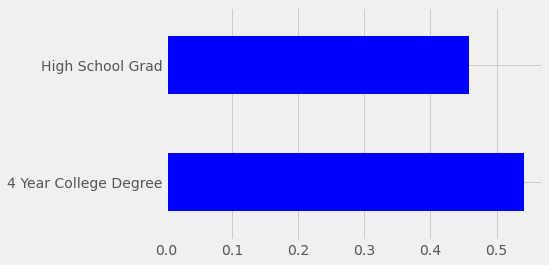

In [257]:
# Throw column names on to feature_importances_ and plot them to get a visual of importance. 
feat_importances = pd.Series(forest.feature_importances_, index = X.columns)
feat_importances.nlargest().plot(kind='barh', color = 'blue');

In [258]:
# Education level of California cities that experienced highest rate of unemployment inside of pandemic
df_1 = c_e.loc[c_e['Highest UR was during Pandemic'] == 1]
print('Average percentage of population with high school diploma: {}'.format(df_1['High School Grad'].mean()))
print('Average percentage of population with college degree: {}'.format(df_1['4 Year College Degree'].mean()))
print('Average peak unemployment rate: {}'.format(df_1['Highest Unemployment Rate'].mean()))

Average percentage of population with high school diploma: 88.04482758620689
Average percentage of population with college degree: 36.12758620689655
Average peak unemployment rate: 13.048275862068966


In [259]:
# Education level of California cities that experienced highest rate of unemployment outside of pandemic
df_0 = c_e.loc[c_e['Highest UR was during Pandemic'] ==0]
print('Average percentage of population with high school diploma: {}'.format(df_0['High School Grad'].mean()))
print('Average percentage of population with college degree: {}'.format(df_0['4 Year College Degree'].mean()))
print('Average peak unemployment rate: {}'.format(df_0['Highest Unemployment Rate'].mean()))

Average percentage of population with high school diploma: 82.42758620689655
Average percentage of population with college degree: 20.437931034482755
Average peak unemployment rate: 21.7448275862069


### Business Problem Results 

The data suggests that the higher levels of education contribute to lower rates of unemployment. Based on the hypothesis from taken from the quote out of Elen Theodossiou and Steven F. Hipple article, __['Unemployment remains high in 2010'](https://www.bls.gov/opub/mlr/2011/03/art1full.pdf)__, __"Workers with less education continued to experience a
substantially higher unemployment rate than did better educated members of the labor force."__(4), we can conclude that this is in fact apparently true. Counties in California with larger populations/concentrations of highly educated workers saw the highest rate of unemployment due to the pandemic, and on average the counties that experienced their highest rate of unemployment from the pandemic saw lower peak rates of unemployment outside of it. <br> 

We found that counties that experienced their highest rate of unemployment outside of the pandemic had an average of 82.4% of the population with a high school education and an average of 20.44% of the population with college degrees. 
<br> 

For the counties that experienced their highest rate of unemployment inside of the pandemic, the average percentage of high school grads was 88.04% and the average percentage of college grads was 36.13%. 
<br> 

Furthermore, counties with higher average percentages of the population with college degrees also saw lower peak unemployment rates, 13.05% to 21.74%. 

In [260]:
# Final cell in notebook is meant to create new dataset

# c_e = county_ed.copy()
# c_e.to_csv('county_ed.csv', index=False)